# Scaling Test

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random as rand

from sklearn import set_config
set_config(transform_output='pandas')

from sklearn.metrics import pairwise_distances
import seaborn as sns

## Import Data

In [10]:
music_points1 = pd.read_csv("spotify_10_songs.csv")
music_points2 = pd.read_csv("spotify_5000_songs.csv")

### Clean up the data

In [11]:
music_points1.columns = music_points1.columns.str.strip()
music_points2.columns = music_points2.columns.str.strip()

In [12]:
music_points1.dropna()
music_points2.dropna()

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [13]:
# columns to drop artist, mode, time_signature, id and html

In [14]:
music_points1 = music_points1.drop(columns={"artist", "mode", "id", "html"})
music_points2 = music_points2.drop(columns={"artist", "mode", "Unnamed: 0", "type", "id", "html"})

In [15]:
music_points1 = music_points1.set_index("song_name")
music_points1

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,
My Band,0.851,0.84900,1,-3.383,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
The Real Slim Shady,0.949,0.66100,5,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
Águas De Março,0.642,0.33900,3,-15.503,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
The Girl From Ipanema,0.641,0.14000,8,-16.790,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
"Paint It, Black",0.464,0.79500,1,-9.267,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
Sultans Of Swing,0.733,0.79400,5,-10.023,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,4,-10.865,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
In Silence,0.736,0.84500,1,-12.017,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,3,-33.503,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3


In [16]:
music_points2 = music_points2.set_index("name")
music_points2

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,0.7420,0.39900,2,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,0.7050,0.05020,4,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,0.6510,0.11900,6,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


## Scale the Data

In [17]:
minmax_Scaler = MinMaxScaler()

### Small Set

In [18]:
music_points1_scaled = minmax_Scaler.fit_transform(music_points1)
music_points1_scaled

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,
My Band,0.871895,1.000000,0.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady,1.000000,0.776369,0.571429,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Águas De Março,0.598693,0.393341,0.285714,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
The Girl From Ipanema,0.597386,0.156625,1.000000,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
"Paint It, Black",0.366013,0.935766,0.000000,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
Sultans Of Swing,0.717647,0.934576,0.571429,0.779548,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
Space Raiders - Charlotte de Witte Remix,0.738562,0.859636,0.428571,0.751594,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
In Silence,0.721569,0.995242,0.000000,0.713347,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.000000,0.000000,0.285714,0.000000,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0


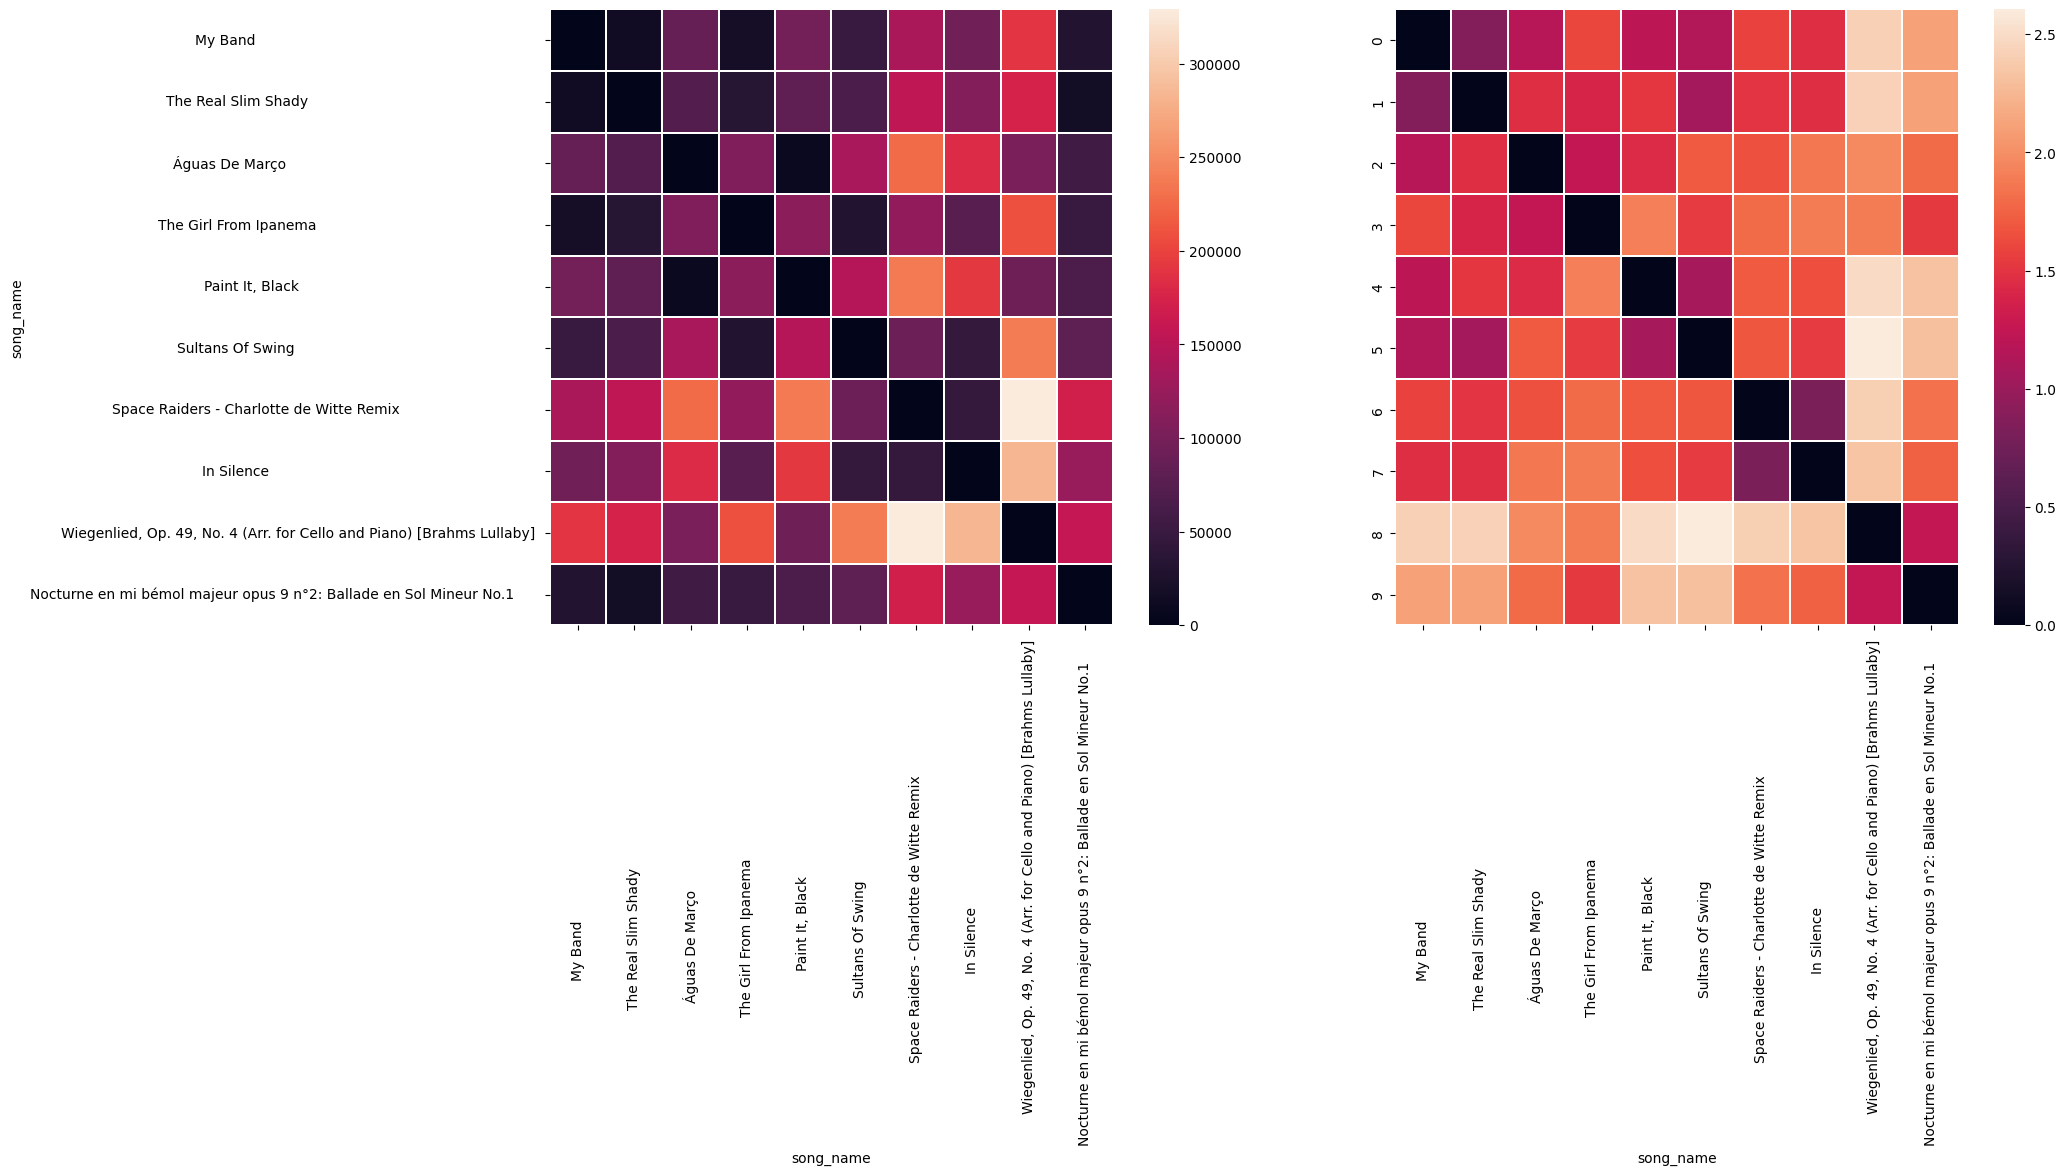

In [19]:
# Making the DataFrame for the Power heatmap
music_distances = pd.DataFrame(pairwise_distances(music_points1),
                                        index=music_points1.index,
                                        columns=music_points1.index)

music_distances_scaled = pd.DataFrame(pairwise_distances(music_points1_scaled),
                                        columns=music_points1_scaled.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(music_distances, ax=ax1, linewidths=.2);
sns.heatmap(music_distances_scaled, ax=ax2, linewidths=.2);

plt.show()

### Big Set

In [20]:
music_points2_scaled = minmax_Scaler.fit_transform(music_points2)
music_points2_scaled

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,0.673216,0.11900,0.545455,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


## K-Means Models

In [21]:
seed = 123
kmeans1 = KMeans(n_clusters = 3, random_state = seed, verbose=3)

In [22]:
seed = 45
kmeans2 = KMeans(n_clusters = 3, random_state = seed, verbose=3)

In [23]:
seed = 327
kmeans3 = KMeans(n_clusters = 3, random_state = seed, verbose=3)

In [93]:
kmeans = KMeans(n_clusters = 20, n_init=25, verbose=3)

### Fitting the Small Set with different K-Means

In [ ]:
# K-Means 1 Test

In [25]:
kmeans1.fit(music_points1)

Initialization complete
Iteration 0, inertia 17558210156.00956.
Iteration 1, inertia 11275751394.023932.
Converged at iteration 1: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [27]:
kmeans1.fit(music_points1_scaled)

Initialization complete
Iteration 0, inertia 13.457050665638837.
Iteration 1, inertia 7.717397397189751.
Converged at iteration 1: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [32]:
music_points1["clusters"] = kmeans1.labels_
music_points1_scaled["clusters"] = kmeans1.labels_

In [36]:
music_points1["clusters"]

song_name
My Band                                                                     1
The Real Slim Shady                                                         1
Águas De Março                                                              1
The Girl From Ipanema                                                       1
Paint It, Black                                                             1
Sultans Of Swing                                                            1
Space Raiders - Charlotte de Witte Remix                                    0
In Silence                                                                  0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]       2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1          2
Name: clusters, dtype: int32

In [37]:
music_points1_scaled["clusters"]

song_name
My Band                                                                     1
The Real Slim Shady                                                         1
Águas De Março                                                              1
The Girl From Ipanema                                                       1
Paint It, Black                                                             1
Sultans Of Swing                                                            1
Space Raiders - Charlotte de Witte Remix                                    0
In Silence                                                                  0
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]       2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1          2
Name: clusters, dtype: int32

In [38]:
# K-Means 2 Test

In [39]:
kmeans2.fit(music_points1)

Initialization complete
Iteration 0, inertia 15200712828.788902.
Iteration 1, inertia 15083572932.22836.
Converged at iteration 1: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,45
,copy_x,True
,algorithm,'lloyd'


In [40]:
kmeans2.fit(music_points1_scaled)

Initialization complete
Iteration 0, inertia 13.276548856072495.
Iteration 1, inertia 7.661584184011242.
Converged at iteration 1: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,45
,copy_x,True
,algorithm,'lloyd'


In [41]:
music_points1["clusters"] = kmeans2.labels_
music_points1_scaled["clusters"] = kmeans2.labels_

In [42]:
music_points1["clusters"]

song_name
My Band                                                                     1
The Real Slim Shady                                                         1
Águas De Março                                                              2
The Girl From Ipanema                                                       2
Paint It, Black                                                             1
Sultans Of Swing                                                            1
Space Raiders - Charlotte de Witte Remix                                    1
In Silence                                                                  1
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]       0
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1          0
Name: clusters, dtype: int32

In [43]:
music_points1_scaled["clusters"]

song_name
My Band                                                                     1
The Real Slim Shady                                                         1
Águas De Março                                                              2
The Girl From Ipanema                                                       2
Paint It, Black                                                             1
Sultans Of Swing                                                            1
Space Raiders - Charlotte de Witte Remix                                    1
In Silence                                                                  1
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]       0
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1          0
Name: clusters, dtype: int32

In [44]:
# K-Means 3 Test

In [45]:
kmeans3.fit(music_points1)

Initialization complete
Iteration 0, inertia 20308011756.92672.
Iteration 1, inertia 11789094443.207493.
Converged at iteration 1: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,327
,copy_x,True
,algorithm,'lloyd'


In [46]:
kmeans3.fit(music_points1_scaled)

Initialization complete
Iteration 0, inertia 14.04981082746194.
Iteration 1, inertia 8.200307545864446.
Converged at iteration 1: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,327
,copy_x,True
,algorithm,'lloyd'


In [47]:
music_points1["clusters"] = kmeans3.labels_
music_points1_scaled["clusters"] = kmeans3.labels_

In [48]:
music_points1["clusters"]

song_name
My Band                                                                     2
The Real Slim Shady                                                         2
Águas De Março                                                              2
The Girl From Ipanema                                                       2
Paint It, Black                                                             0
Sultans Of Swing                                                            0
Space Raiders - Charlotte de Witte Remix                                    2
In Silence                                                                  2
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]       1
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1          1
Name: clusters, dtype: int32

In [49]:
music_points1_scaled["clusters"]

song_name
My Band                                                                     2
The Real Slim Shady                                                         2
Águas De Março                                                              2
The Girl From Ipanema                                                       2
Paint It, Black                                                             0
Sultans Of Swing                                                            0
Space Raiders - Charlotte de Witte Remix                                    2
In Silence                                                                  2
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]       1
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1          1
Name: clusters, dtype: int32

### Fitting the Big Set with different K-Means

In [50]:
seed = 123
kmeans1 = KMeans(n_clusters = 20, random_state = seed, verbose=3)

In [51]:
seed = 45
kmeans3 = KMeans(n_clusters = 20, random_state = seed, verbose=3)

In [52]:
seed = 327
kmeans3 = KMeans(n_clusters = 20, random_state = seed, verbose=3)

In [53]:
# K-Means 1 Test

In [54]:
kmeans1.fit(music_points2)

Initialization complete
Iteration 0, inertia 811813233128.3438.
Iteration 1, inertia 741837753227.2445.
Iteration 2, inertia 732733743779.9443.
Iteration 3, inertia 725004651118.9857.
Iteration 4, inertia 719209202834.78.
Iteration 5, inertia 715651422765.636.
Iteration 6, inertia 714058787386.3076.
Iteration 7, inertia 713121187868.4646.
Iteration 8, inertia 712675313109.6389.
Iteration 9, inertia 712208677335.5803.
Iteration 10, inertia 711796943370.8657.
Iteration 11, inertia 711533621495.2262.
Iteration 12, inertia 711296934688.7849.
Converged at iteration 12: center shift 132381.064044548 within tolerance 153273.36437370515.


,n_clusters,20
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [55]:
kmeans1.fit(music_points2_scaled)

Initialization complete
Iteration 0, inertia 1091.3407353731945.
Iteration 1, inertia 829.8973115364208.
Iteration 2, inertia 808.5297146532191.
Iteration 3, inertia 802.037460546945.
Iteration 4, inertia 798.5444168229932.
Iteration 5, inertia 794.8198890705307.
Iteration 6, inertia 791.5438340625968.
Iteration 7, inertia 789.0229647577091.
Iteration 8, inertia 787.0804384490061.
Iteration 9, inertia 786.0313776644001.
Iteration 10, inertia 785.304071182365.
Iteration 11, inertia 784.8841623156057.
Iteration 12, inertia 784.6118665849227.
Iteration 13, inertia 784.5279688195849.
Iteration 14, inertia 784.4345582800981.
Iteration 15, inertia 784.3590703218879.
Iteration 16, inertia 784.2586232624931.
Iteration 17, inertia 784.0643949230334.
Iteration 18, inertia 783.866283844258.
Iteration 19, inertia 783.5820894494359.
Iteration 20, inertia 783.2322762941483.
Iteration 21, inertia 782.6829866316872.
Iteration 22, inertia 782.0348995191786.
Iteration 23, inertia 781.5341012985075.
Iter

,n_clusters,20
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [56]:
music_points2["clusters"] = kmeans1.labels_
music_points2_scaled["clusters"] = kmeans1.labels_

In [ ]:
# K-Means 2 Test

In [59]:
kmeans2.fit(music_points2)

Initialization complete
Iteration 0, inertia 41031816392188.64.
Iteration 1, inertia 37327278707444.21.
Iteration 2, inertia 34776835952664.14.
Iteration 3, inertia 33238422275385.766.
Iteration 4, inertia 32076167921571.824.
Iteration 5, inertia 31483610254566.984.
Iteration 6, inertia 31209444435282.375.
Iteration 7, inertia 31019552252129.758.
Iteration 8, inertia 30918114186318.29.
Iteration 9, inertia 30849734212802.35.
Iteration 10, inertia 30819549590989.625.
Iteration 11, inertia 30809075811370.215.
Iteration 12, inertia 30793330564036.97.
Iteration 13, inertia 30786262545177.81.
Iteration 14, inertia 30782013510058.684.
Iteration 15, inertia 30779651615306.41.
Iteration 16, inertia 30778941297795.82.
Iteration 17, inertia 30778277516089.06.
Converged at iteration 17: center shift 65406.210494590145 within tolerance 141483.10583269765.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,45
,copy_x,True
,algorithm,'lloyd'


In [60]:
kmeans2.fit(music_points2_scaled)

Initialization complete
Iteration 0, inertia 35381.44919340755.
Iteration 1, inertia 28962.33471471639.
Iteration 2, inertia 28618.628188991992.
Converged at iteration 2: strict convergence.


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,45
,copy_x,True
,algorithm,'lloyd'


In [61]:
music_points2["clusters"] = kmeans2.labels_
music_points2_scaled["clusters"] = kmeans2.labels_

In [ ]:
# K-Means 3 Test

In [62]:
kmeans3.fit(music_points2)

Initialization complete
Iteration 0, inertia 849524850150.009.
Iteration 1, inertia 736921011190.3384.
Iteration 2, inertia 723590564207.2698.
Iteration 3, inertia 711406687394.0056.
Iteration 4, inertia 703392576856.7034.
Iteration 5, inertia 701535893954.3594.
Iteration 6, inertia 700825686840.458.
Iteration 7, inertia 700346978151.5109.
Iteration 8, inertia 699878820236.46.
Iteration 9, inertia 699481422384.3108.
Iteration 10, inertia 699271791639.9127.
Iteration 11, inertia 699098463603.9326.
Converged at iteration 11: center shift 104859.9784628601 within tolerance 141483.10557919275.


,n_clusters,20
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,327
,copy_x,True
,algorithm,'lloyd'


In [63]:
kmeans3.fit(music_points2_scaled)

Initialization complete
Iteration 0, inertia 1371.489994749388.
Iteration 1, inertia 892.5744113466081.
Iteration 2, inertia 863.2046163694755.
Iteration 3, inertia 853.9617737689001.
Iteration 4, inertia 849.3138751330824.
Iteration 5, inertia 846.95676039945.
Iteration 6, inertia 845.261363012339.
Iteration 7, inertia 842.4314229416765.
Iteration 8, inertia 840.13330231946.
Iteration 9, inertia 838.1427416162524.
Iteration 10, inertia 835.8434140692372.
Iteration 11, inertia 832.689091352724.
Iteration 12, inertia 828.0339725378091.
Iteration 13, inertia 825.3248981239882.
Iteration 14, inertia 823.2236581057487.
Iteration 15, inertia 820.7300401470443.
Iteration 16, inertia 817.3881667172429.
Iteration 17, inertia 816.0991361119692.
Iteration 18, inertia 815.1153718608152.
Iteration 19, inertia 814.6084114964137.
Iteration 20, inertia 814.3515071345274.
Iteration 21, inertia 814.2889331235672.
Iteration 22, inertia 814.2485645815466.
Iteration 23, inertia 814.2208014327781.
Iteratio

,n_clusters,20
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,3
,random_state,327
,copy_x,True
,algorithm,'lloyd'


In [64]:
music_points2["clusters"] = kmeans3.labels_
music_points2_scaled["clusters"] = kmeans3.labels_

## K-Analysis

### 123 K-Means

#### Small Set

In [66]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 123)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points1)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

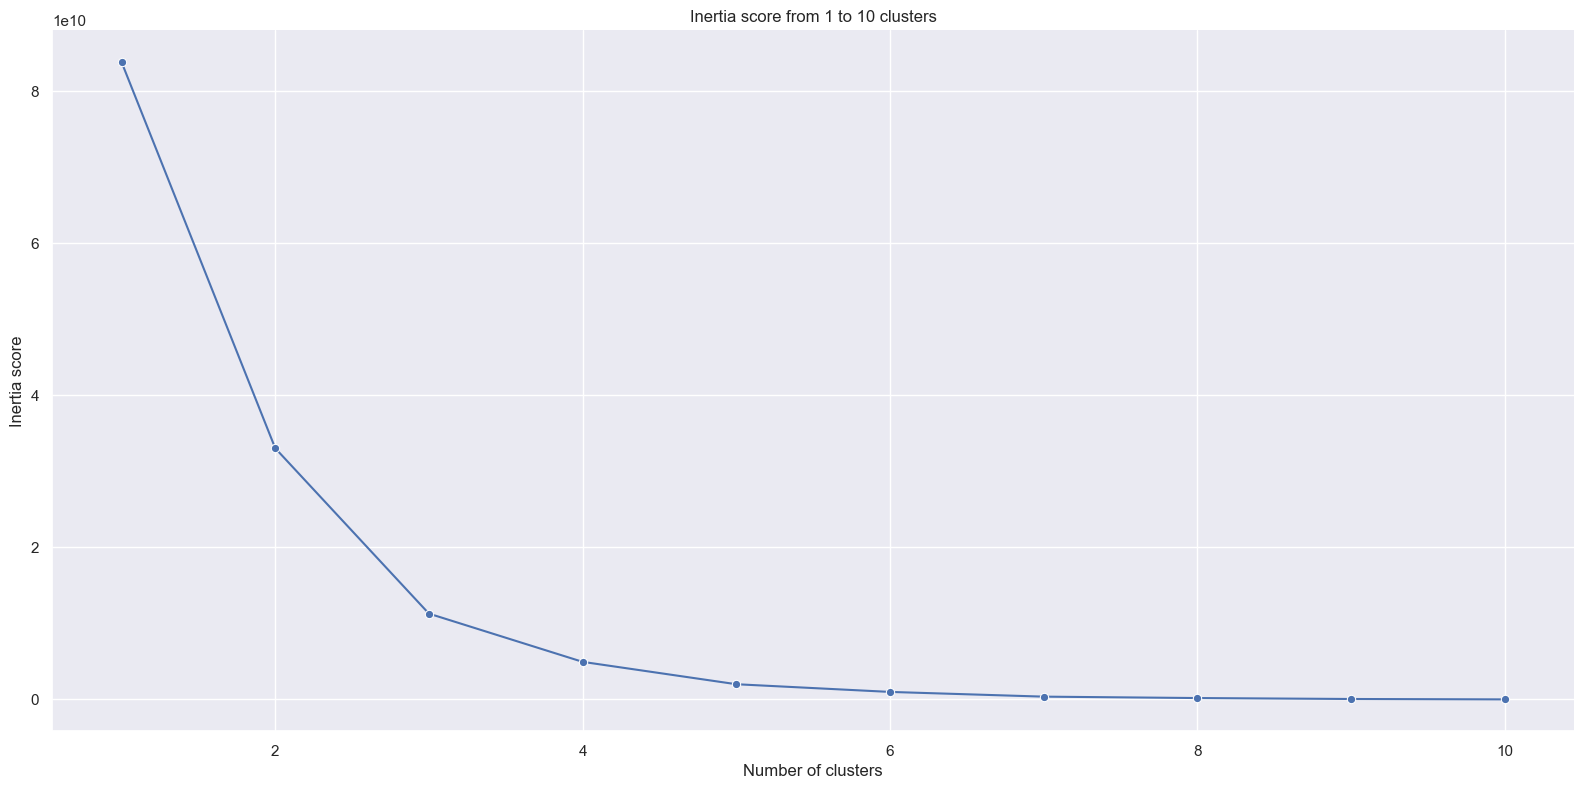

In [67]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [79]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 123)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points1)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points1, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

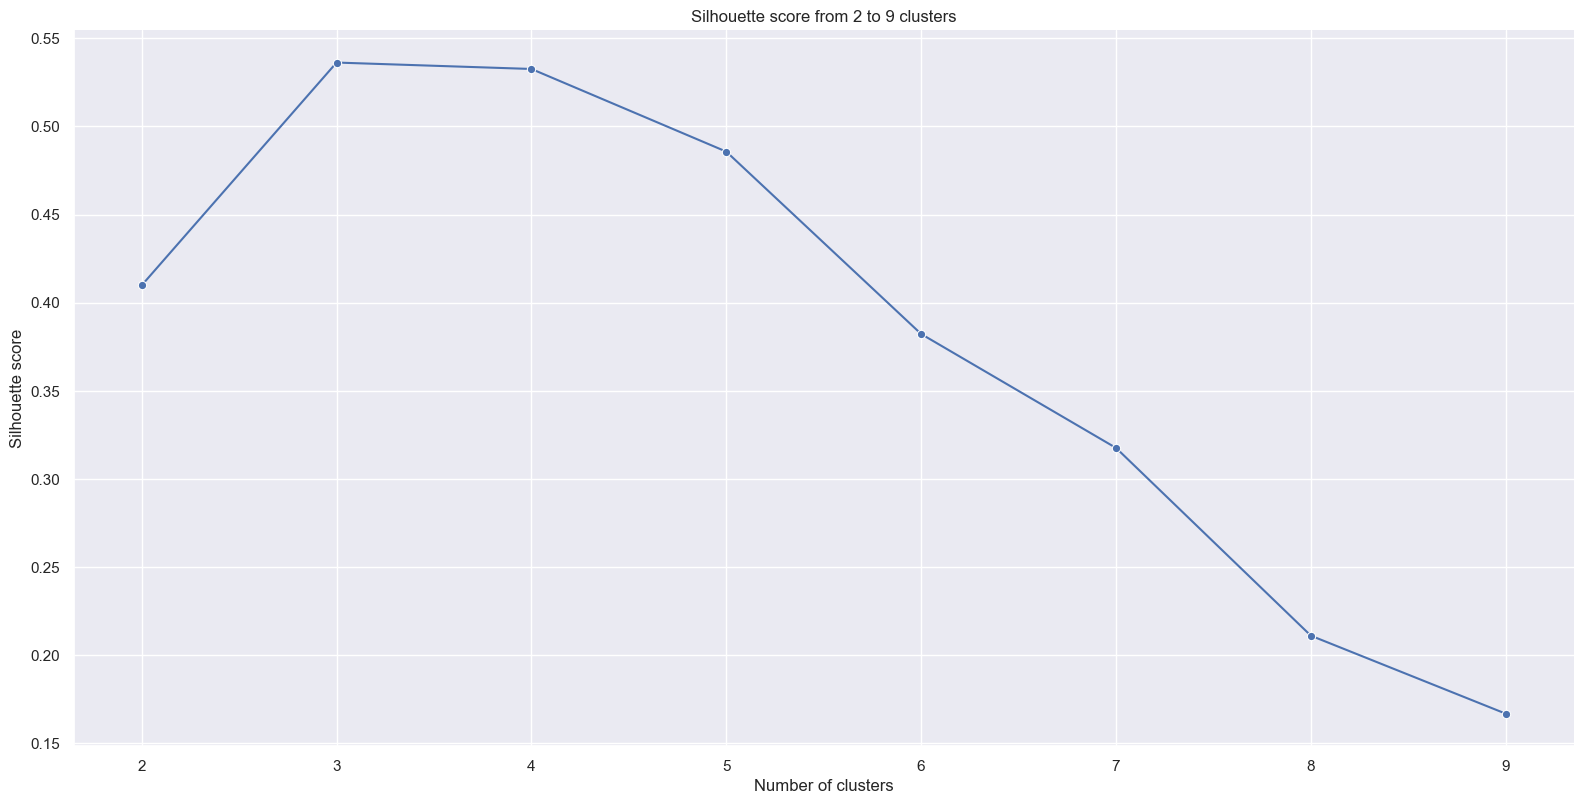

In [80]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [68]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 123)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points1_scaled)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

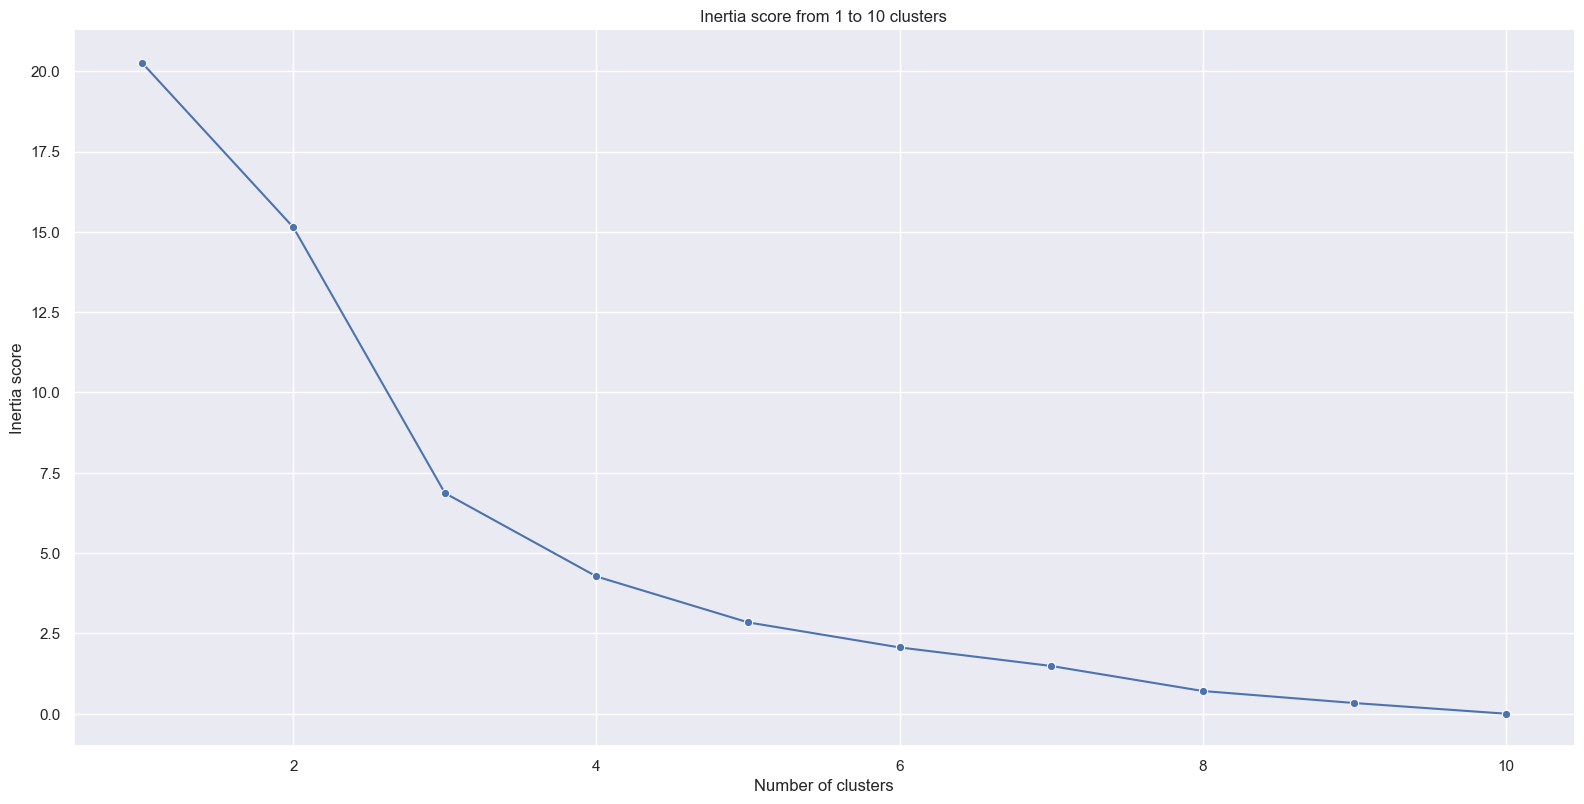

In [69]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [81]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 123)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points1_scaled)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points1_scaled, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

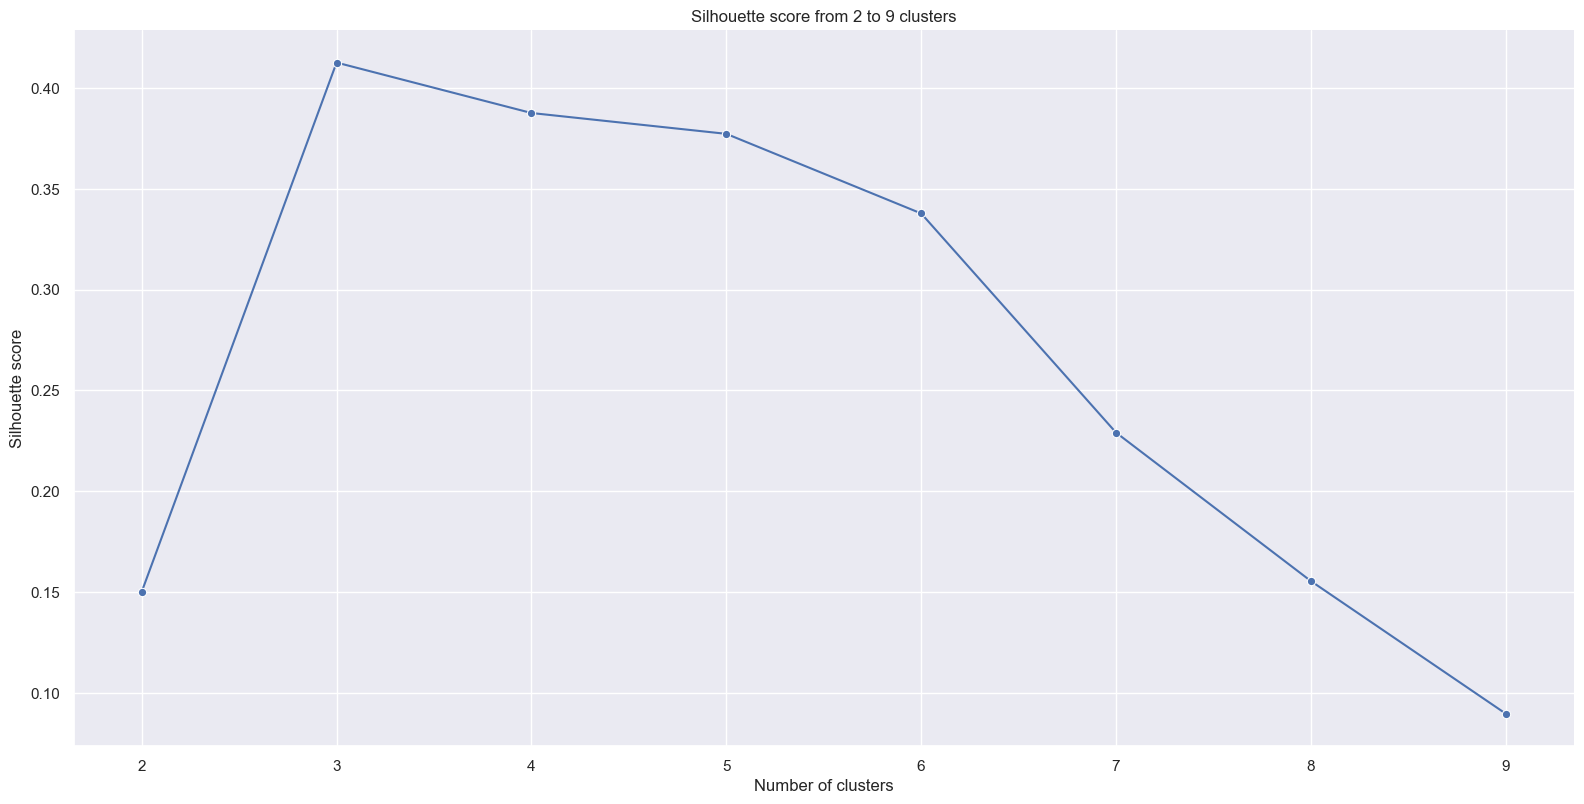

In [82]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

#### Big Set

In [86]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(20, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 123)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points2)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

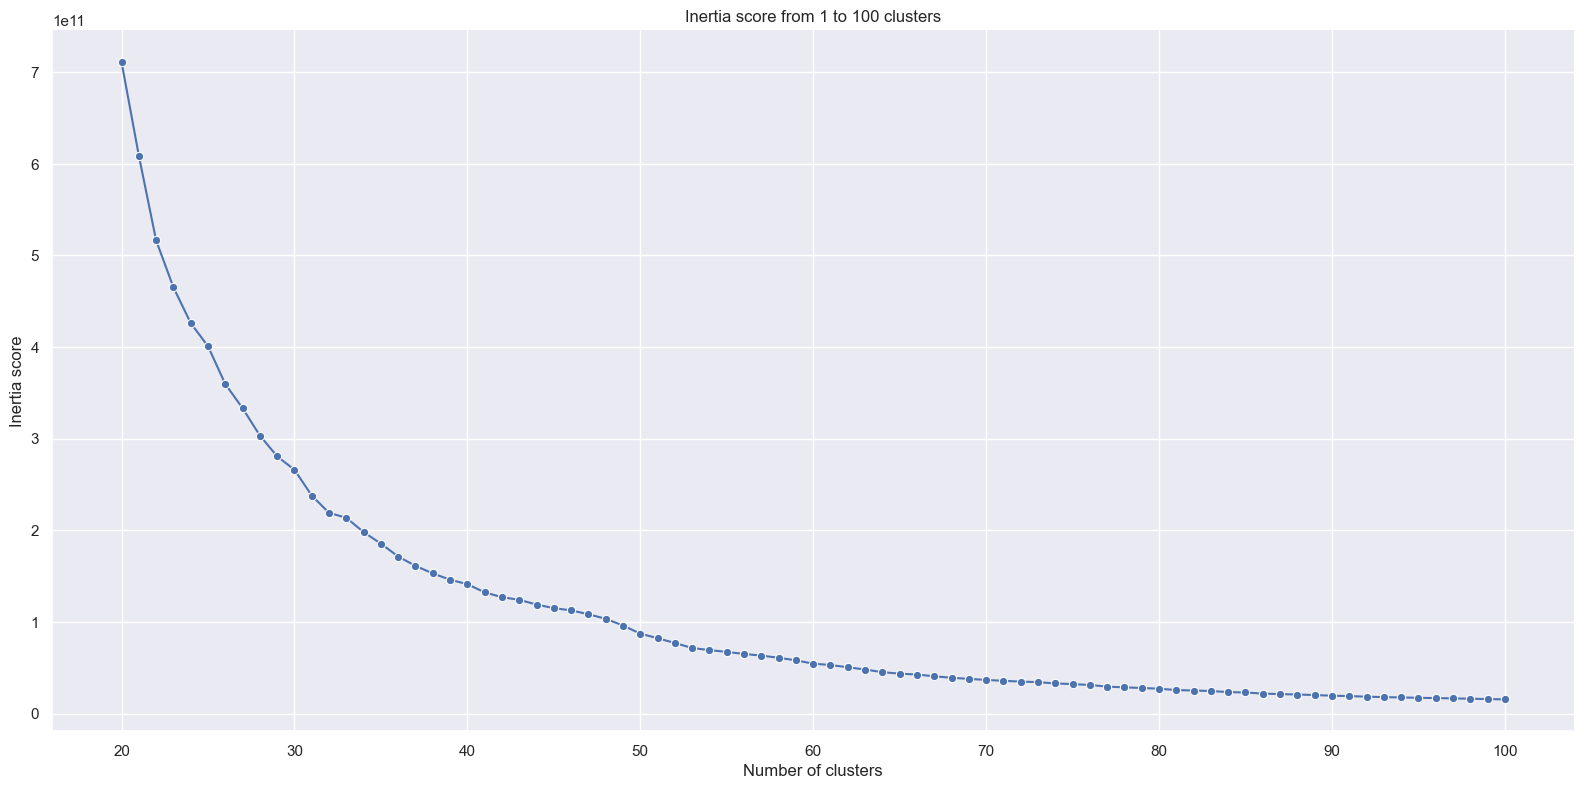

In [87]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 123)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points2)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points2, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

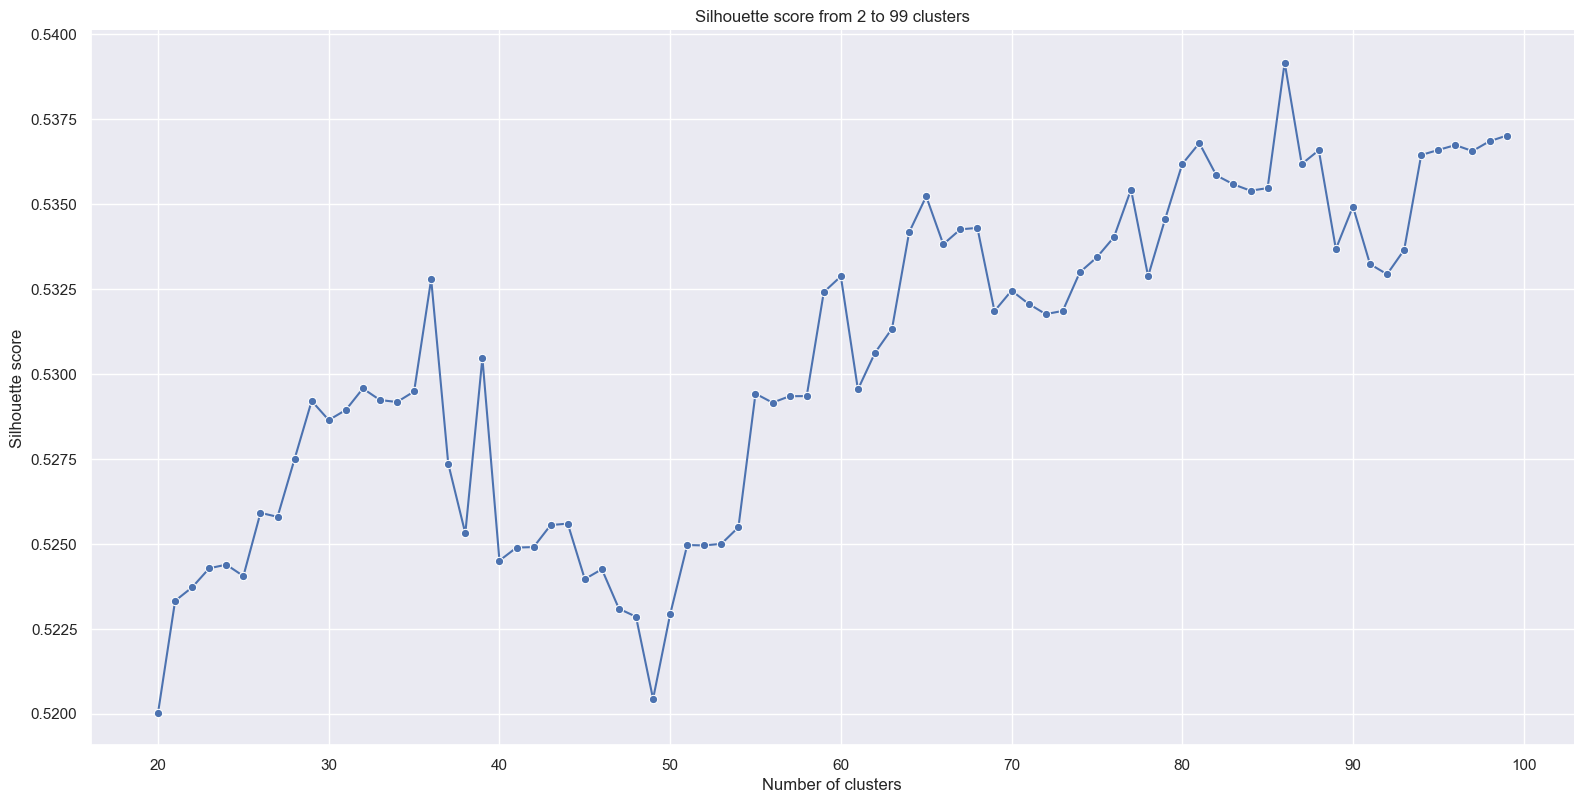

In [ ]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [88]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(20, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 123)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points2_scaled)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

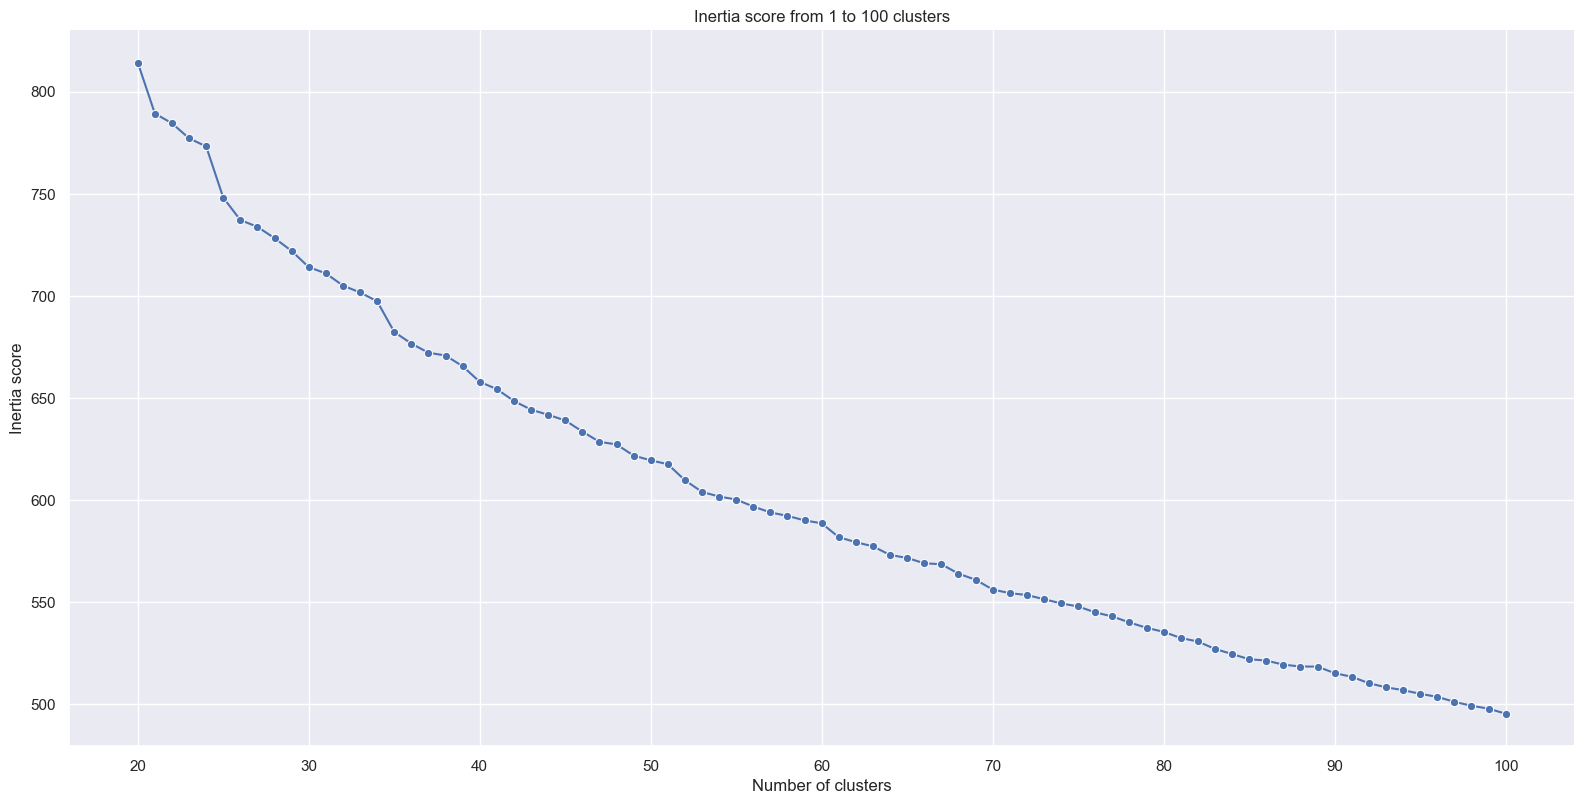

In [89]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [90]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 123)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points2_scaled)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points2_scaled, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

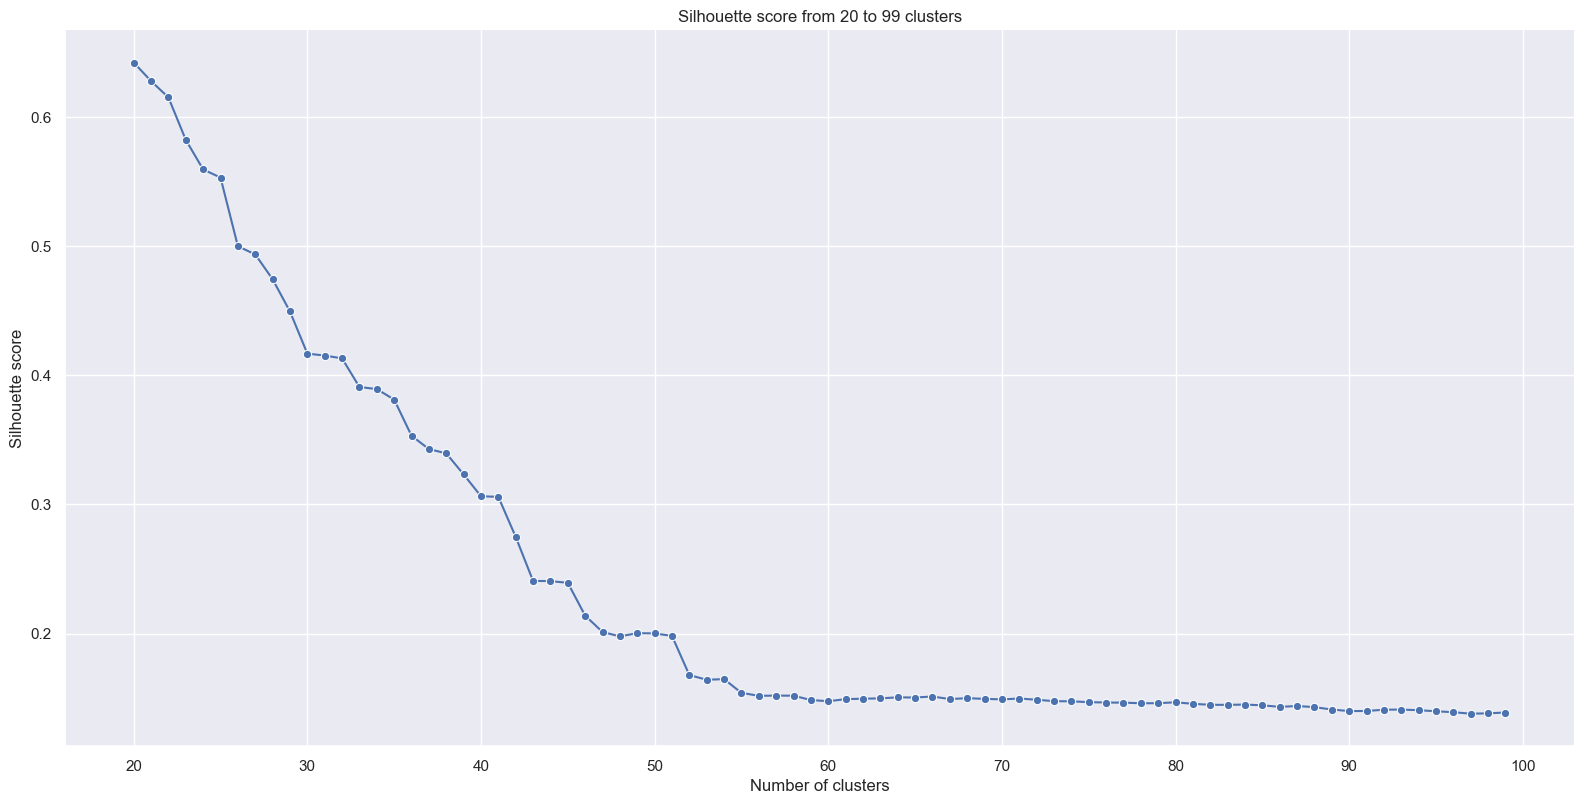

In [92]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

### 45 K-Means

#### Small Set

In [94]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 45)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points1)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

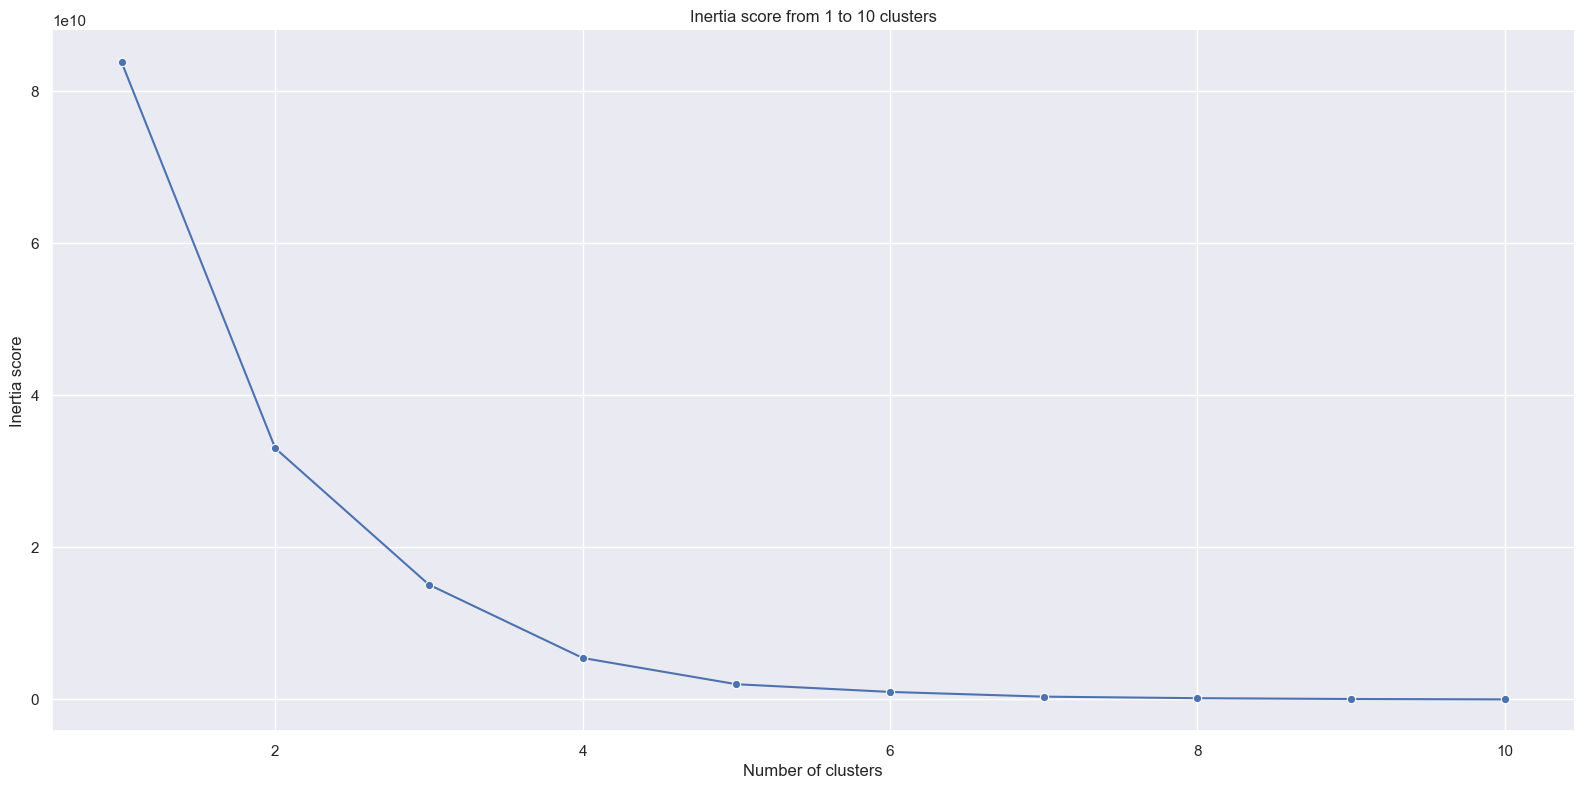

In [95]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [96]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 45)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points1)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points1, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

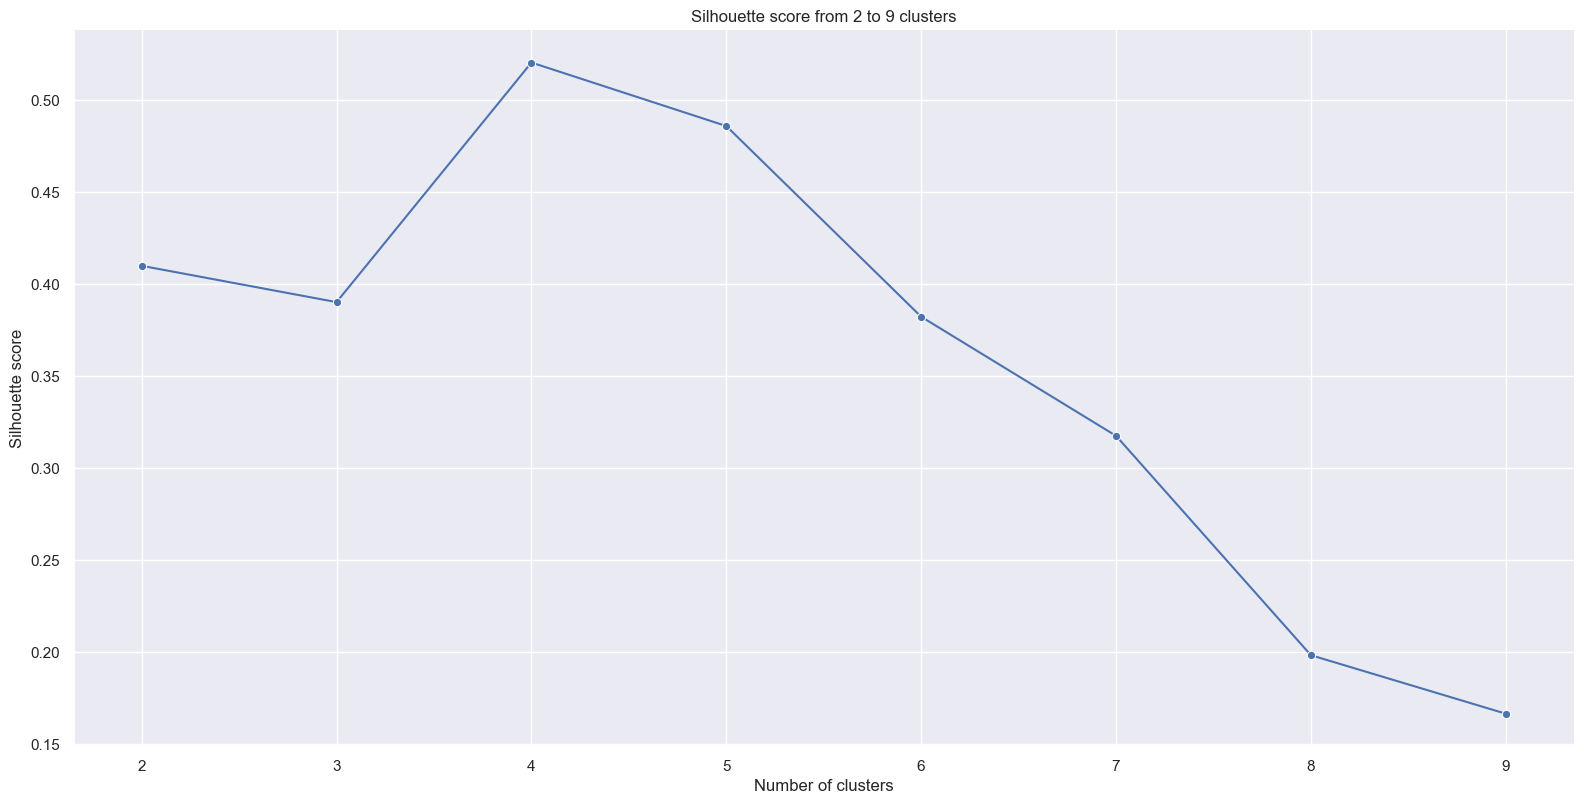

In [97]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [98]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 45)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points1_scaled)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

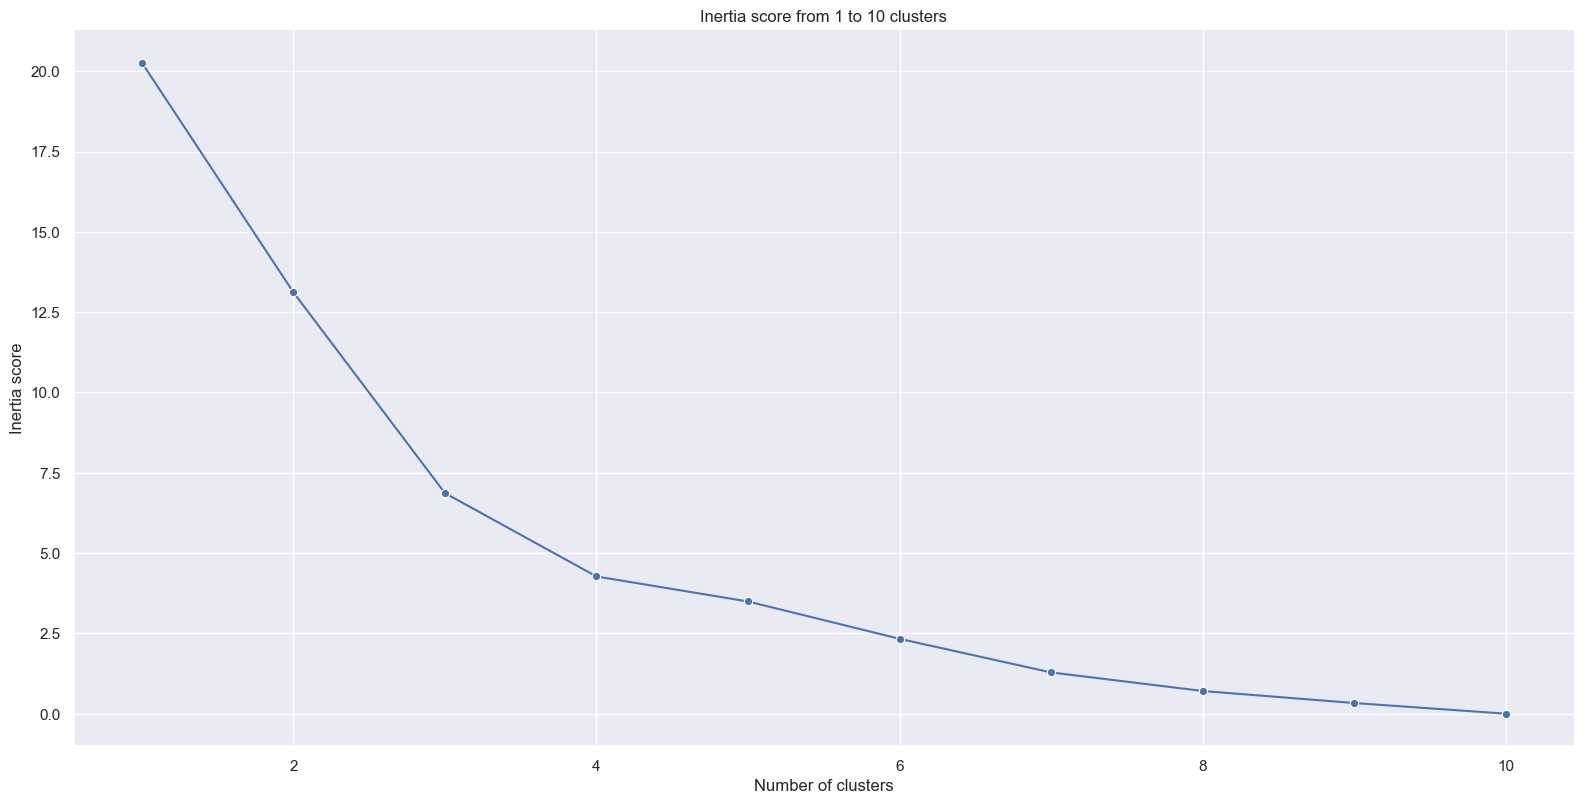

In [99]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [100]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 45)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points1_scaled)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points1_scaled, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

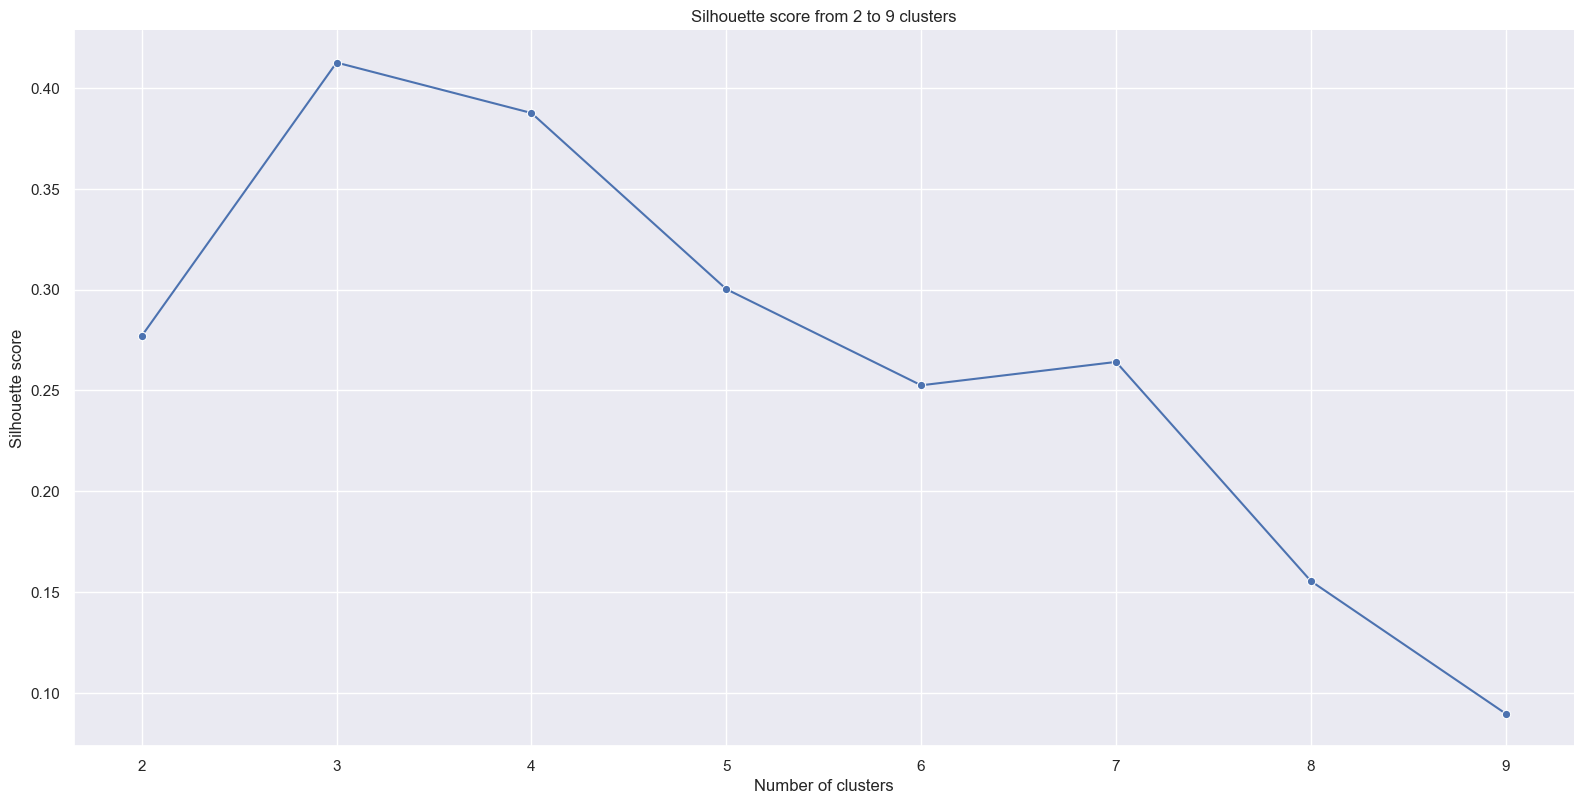

In [101]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

#### Big Set

In [102]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(20, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 45)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points2)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

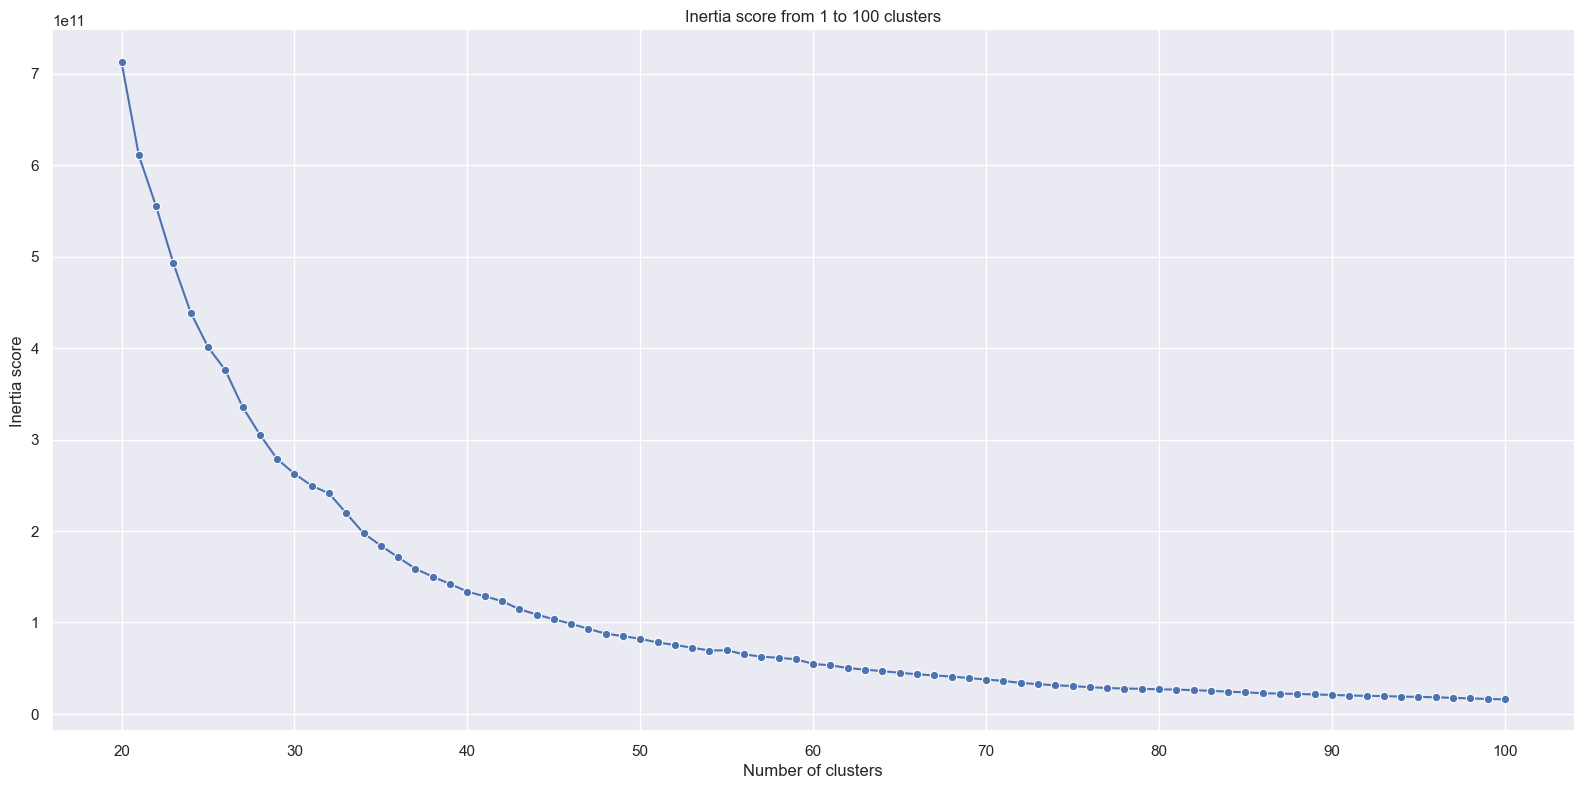

In [103]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [104]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 45)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points2)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points2, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

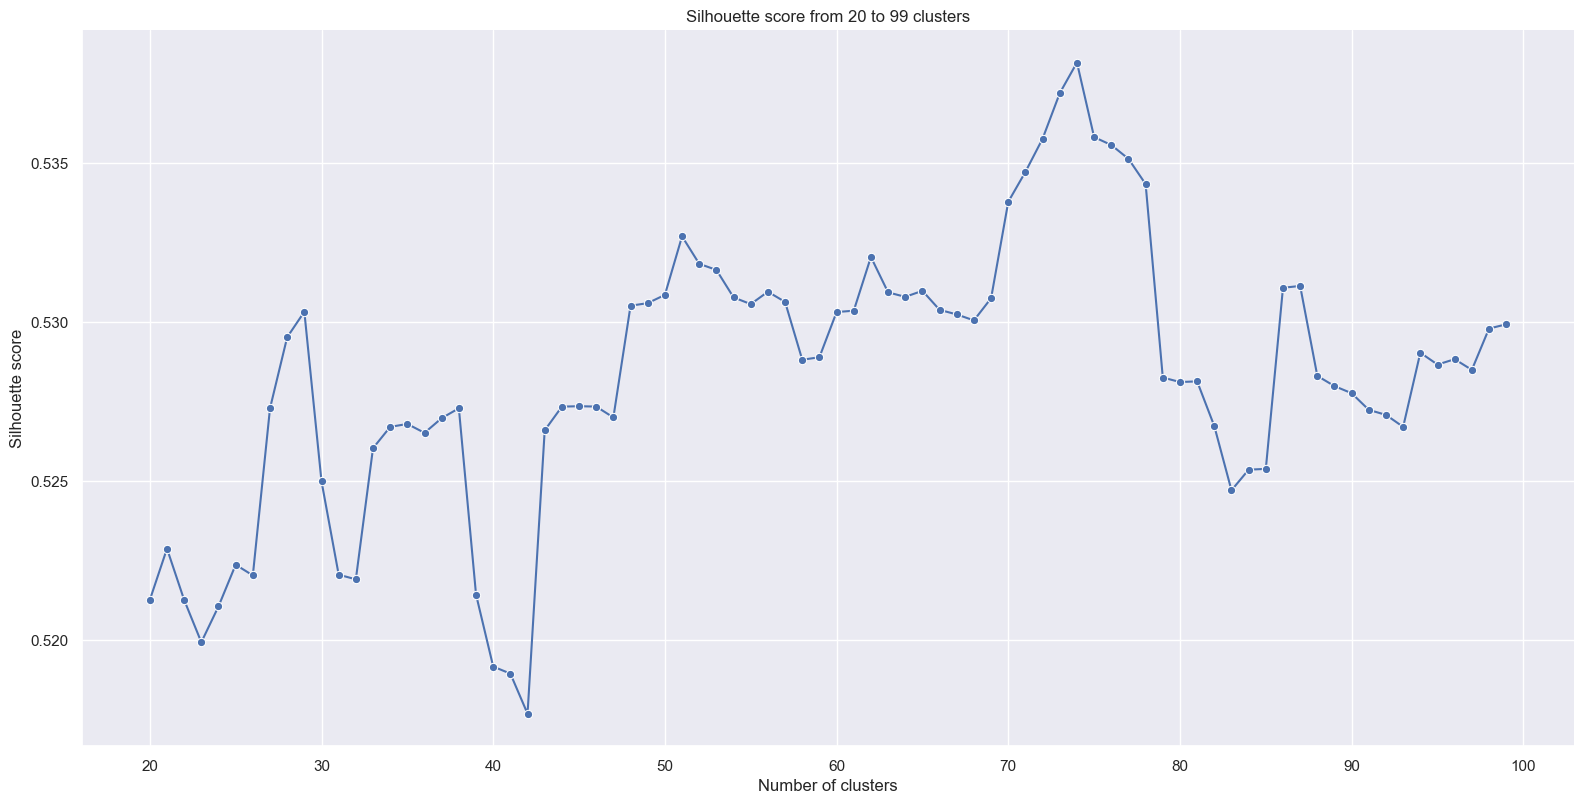

In [105]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [106]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(20, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 45)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points2_scaled)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

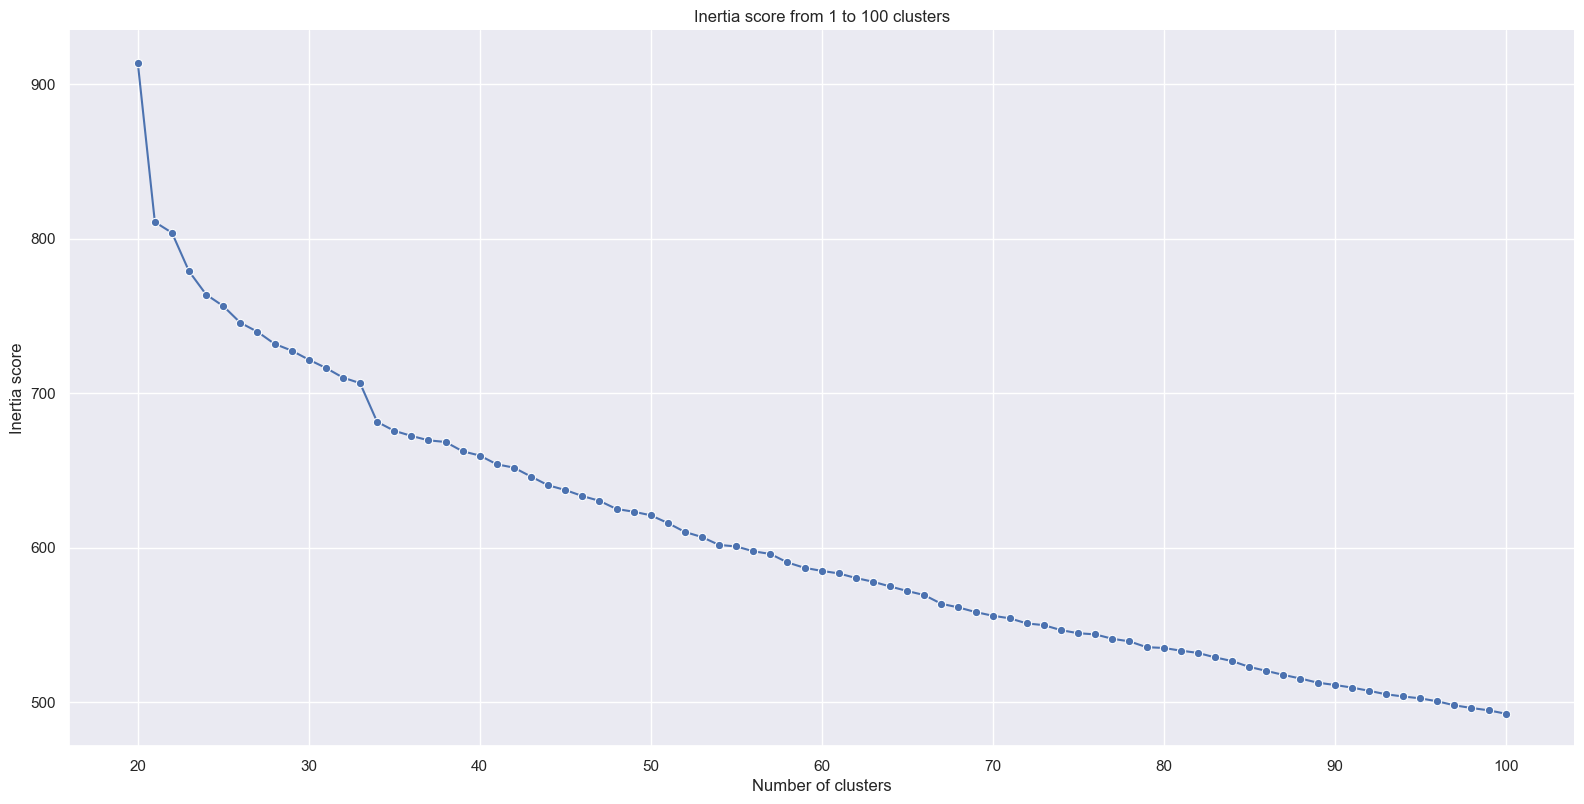

In [107]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [108]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 45)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points2_scaled)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points2_scaled, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

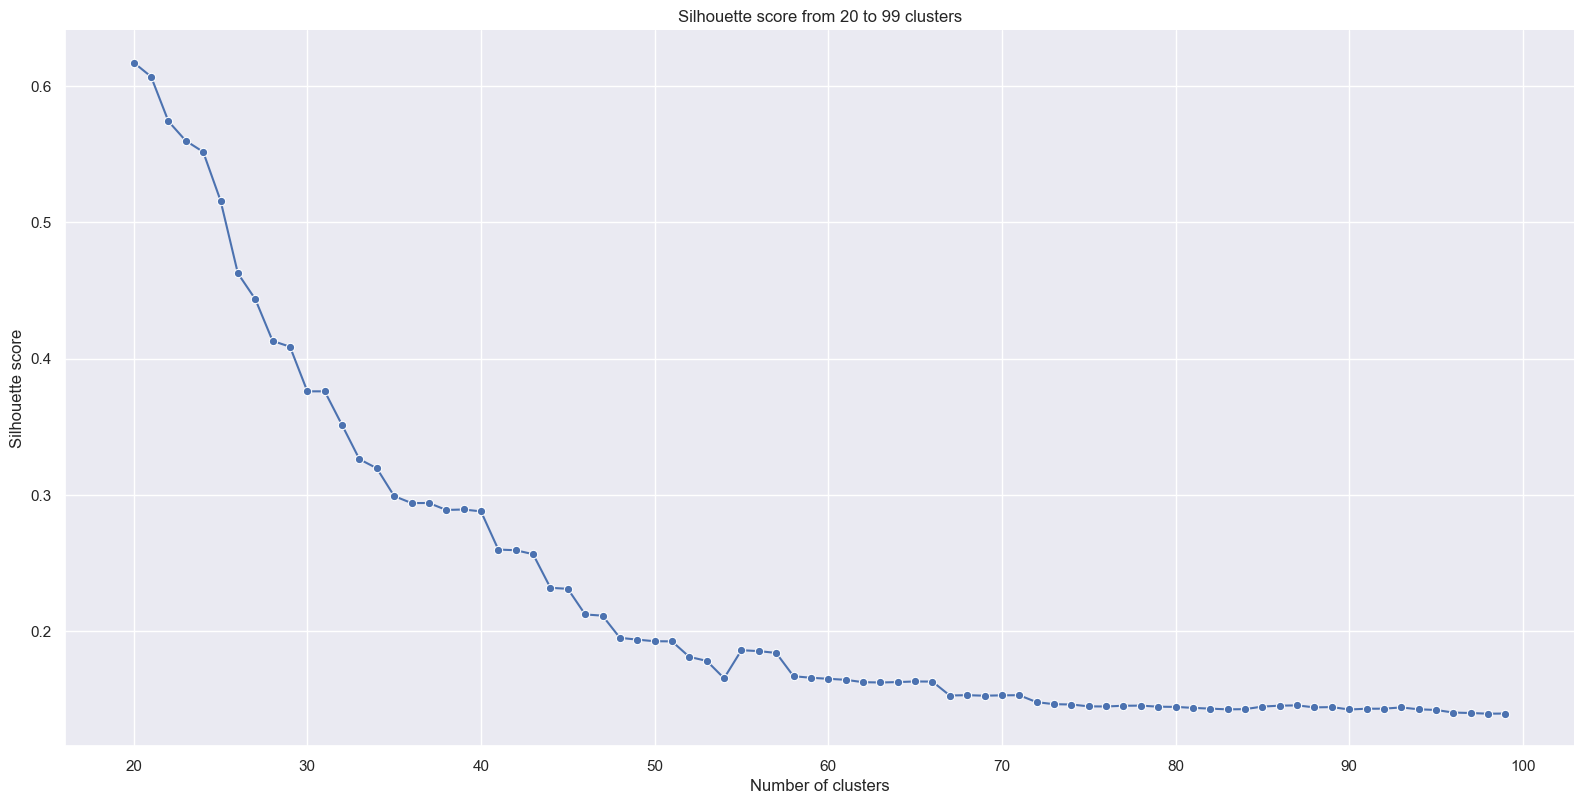

In [109]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

### 327 K-Means

#### Small Set

In [110]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 327)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points1)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

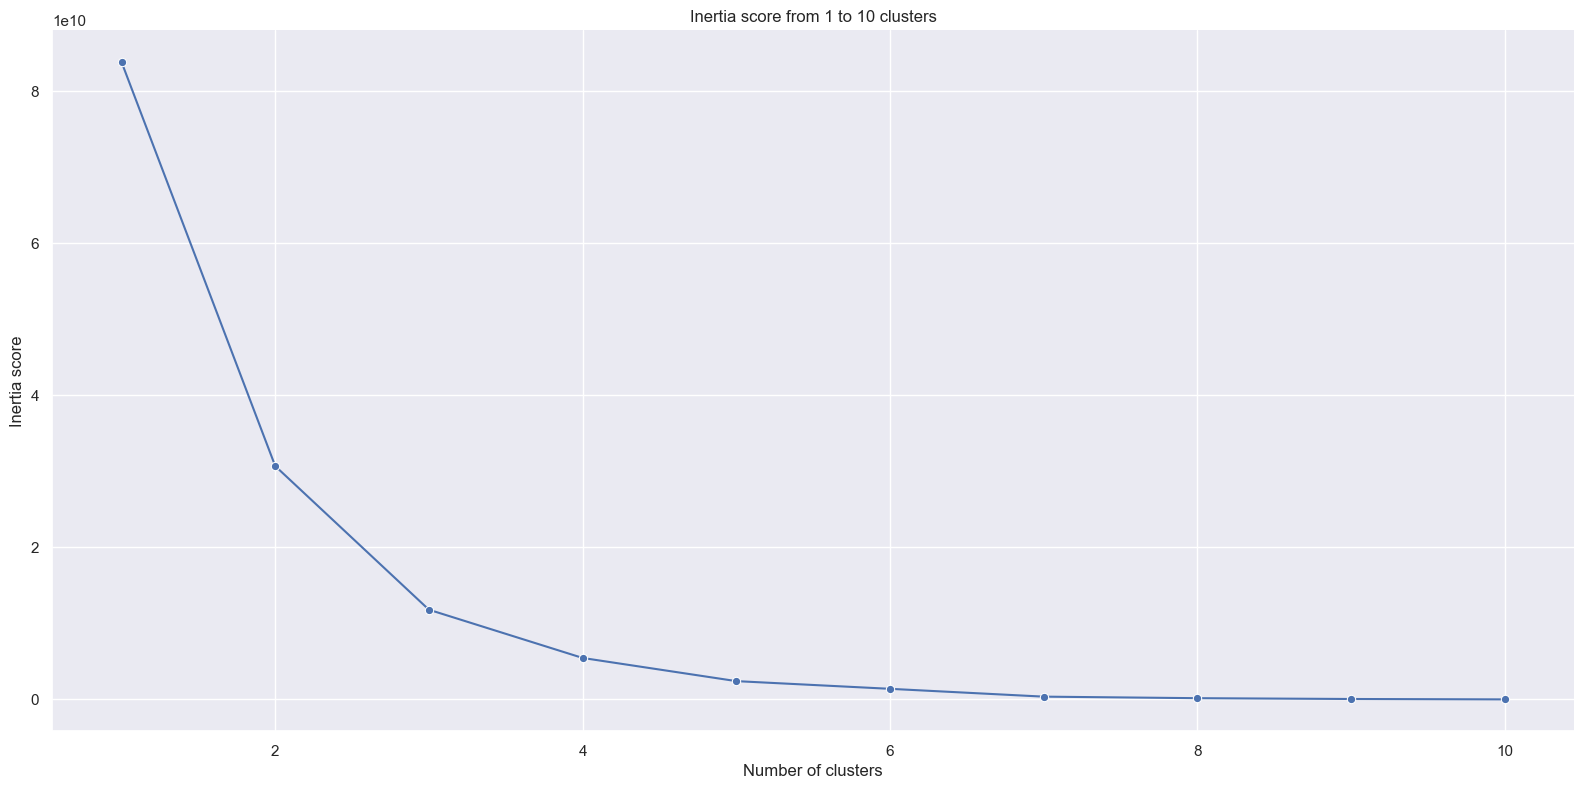

In [111]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [112]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 327)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points1)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points1, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

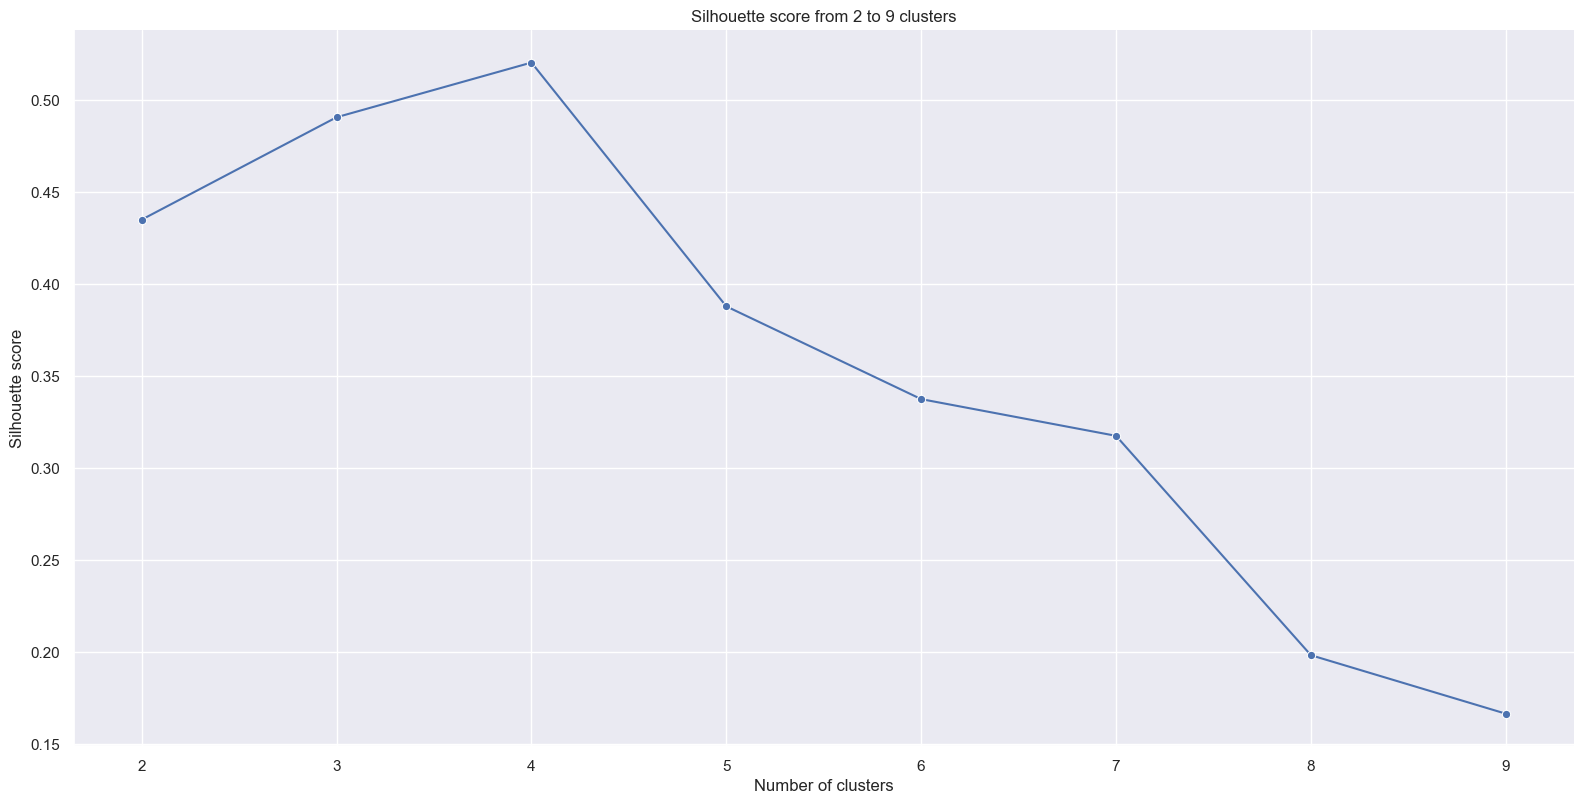

In [113]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [114]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 327)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points1_scaled)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

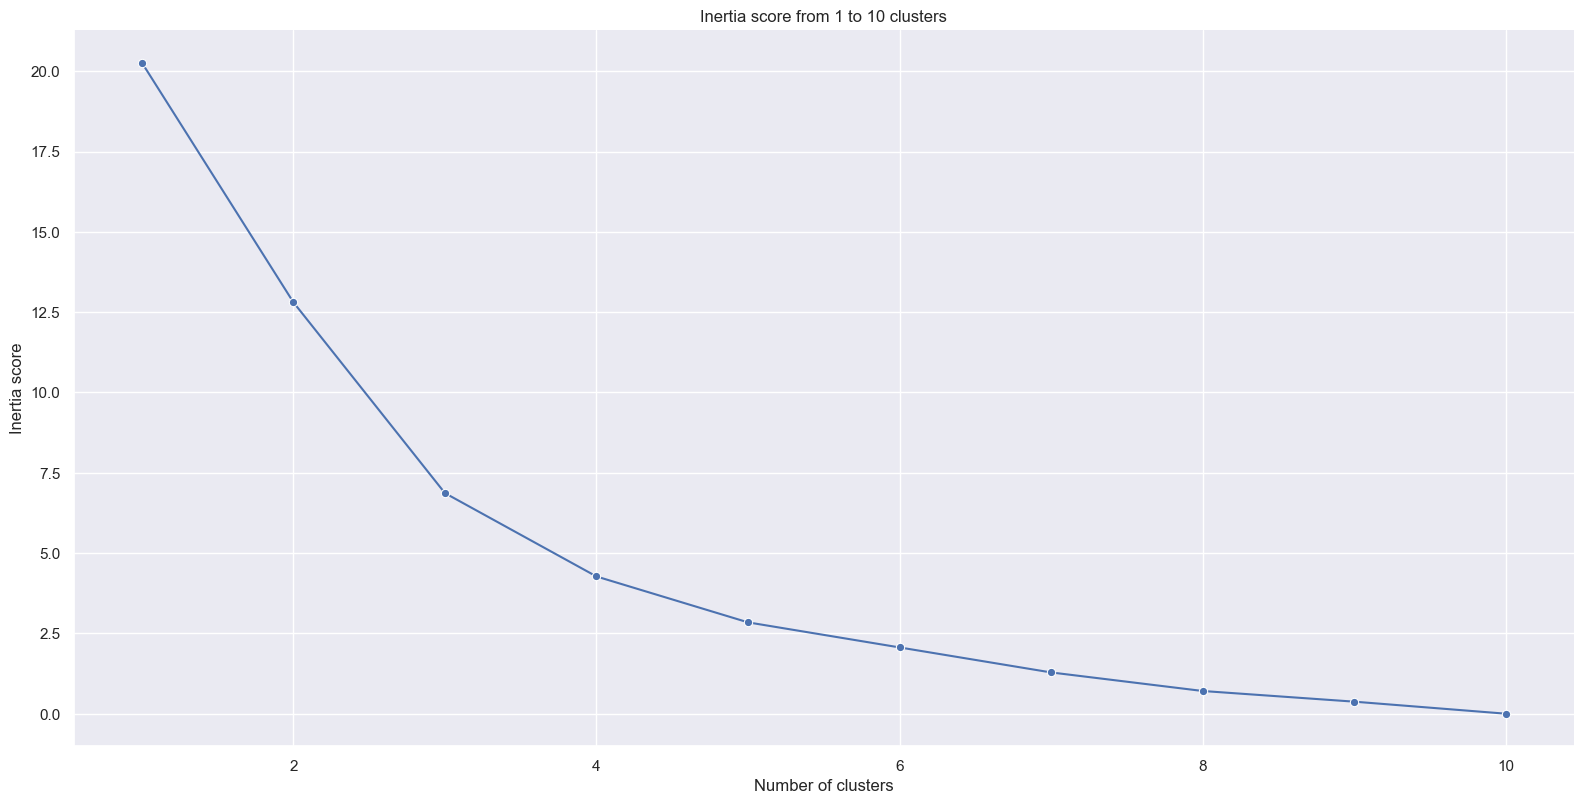

In [115]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [116]:
# Set the maximum number of clusters to try
max_k = 10

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 327)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points1_scaled)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points1_scaled, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

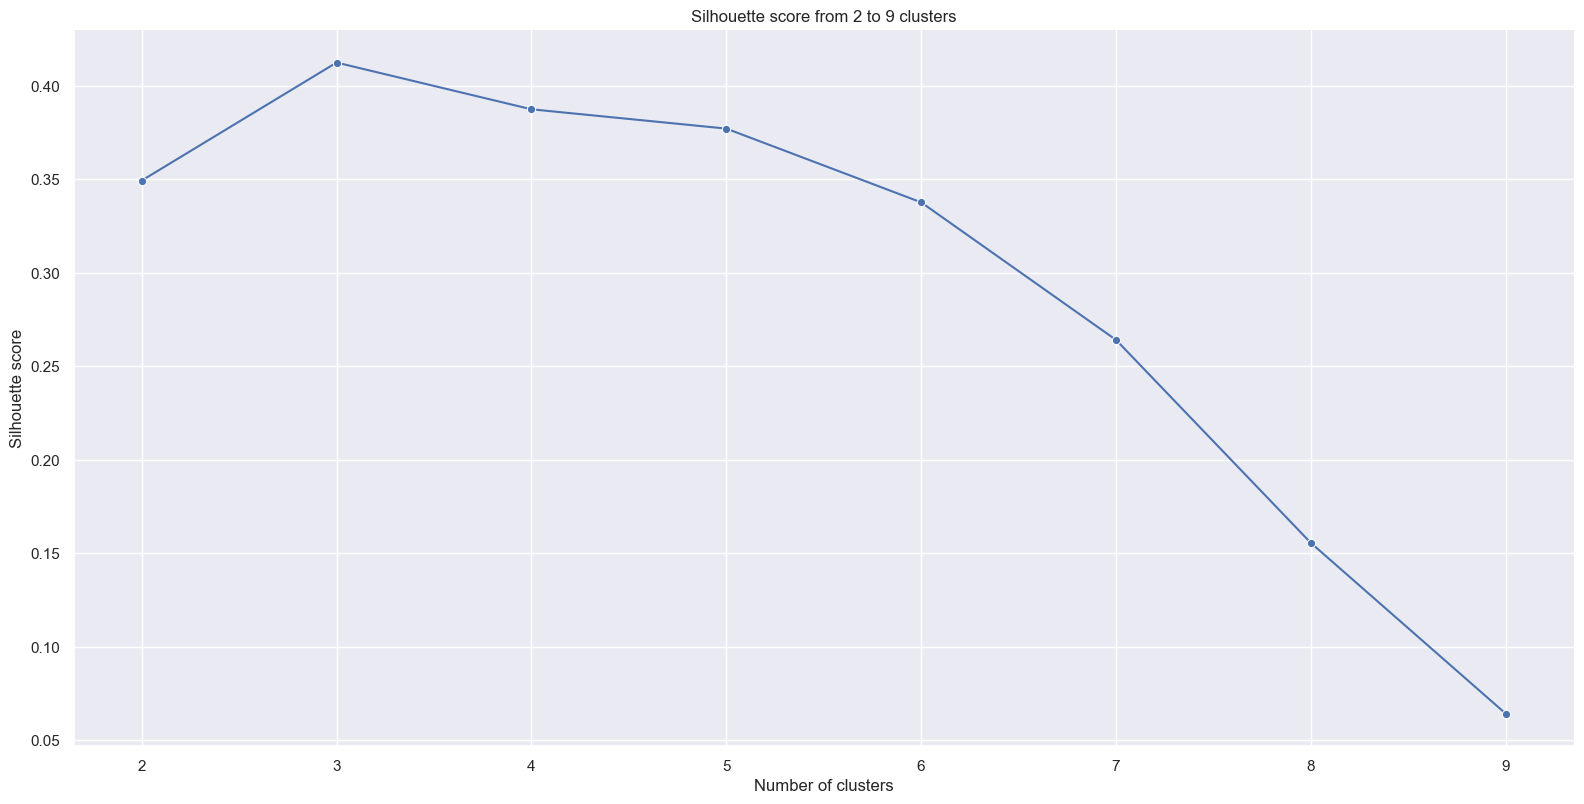

In [117]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

#### Big Set

In [118]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(20, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 327)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points2)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

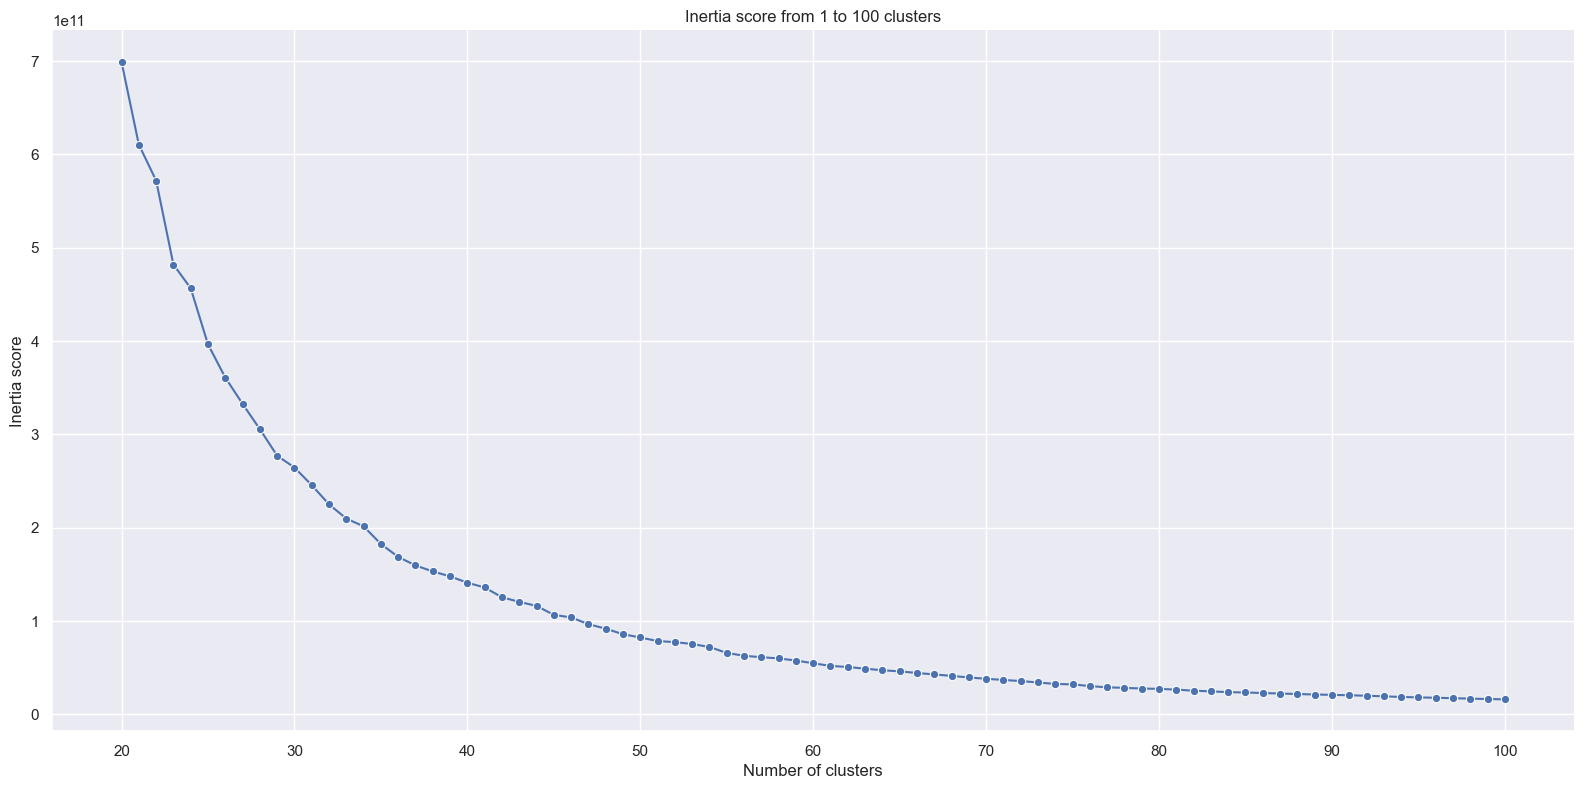

In [119]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [120]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 327)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points2)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points2, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

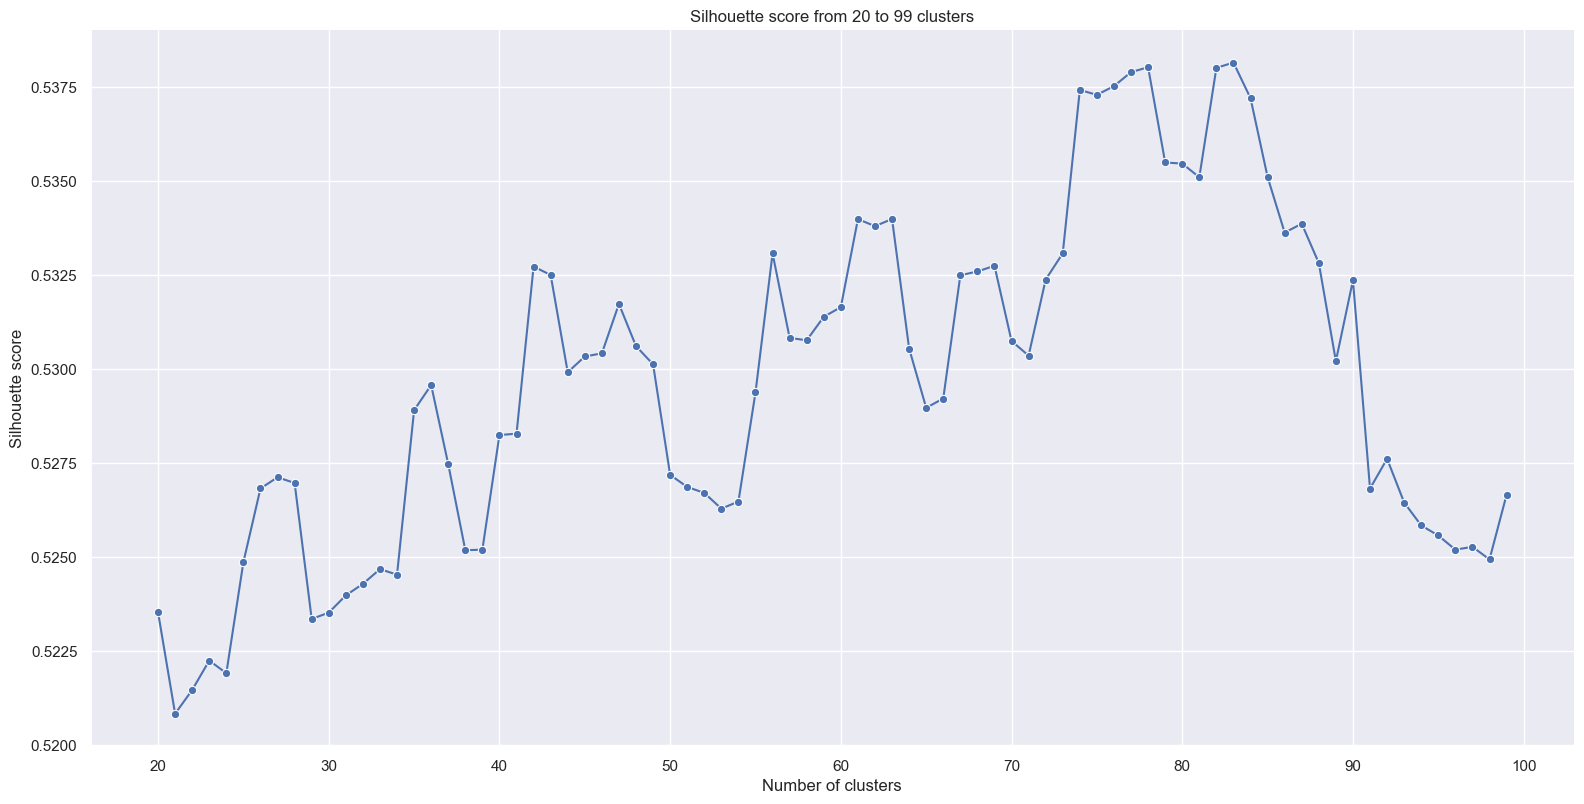

In [121]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [122]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(20, max_k+1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      random_state = 327)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(music_points2_scaled)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

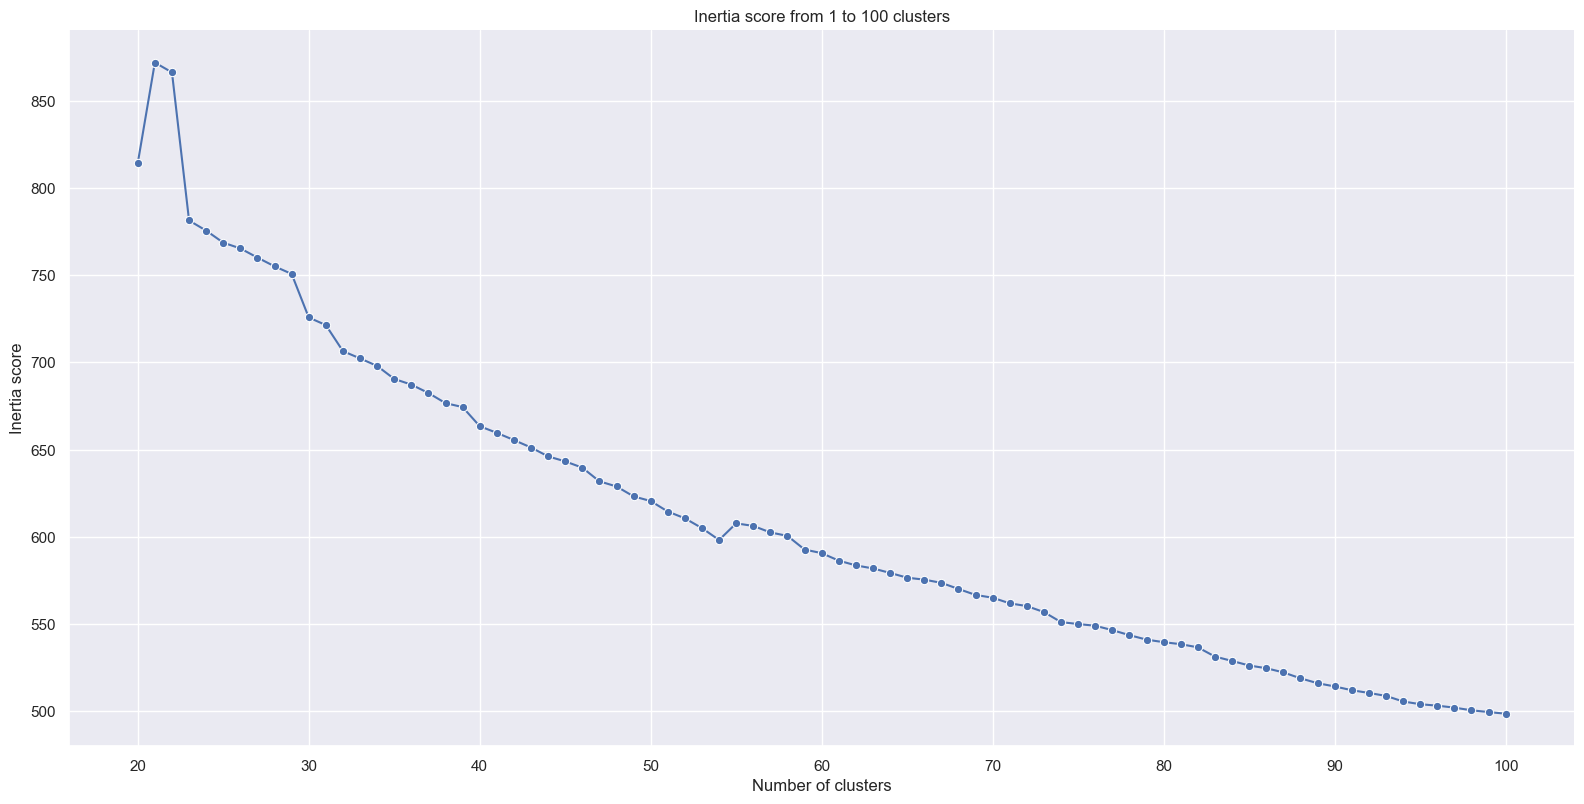

In [123]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [124]:
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []

for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 327)

    # Fit the KMeans model to the scaled data
    kmeans.fit(music_points2_scaled)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(music_points2_scaled, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

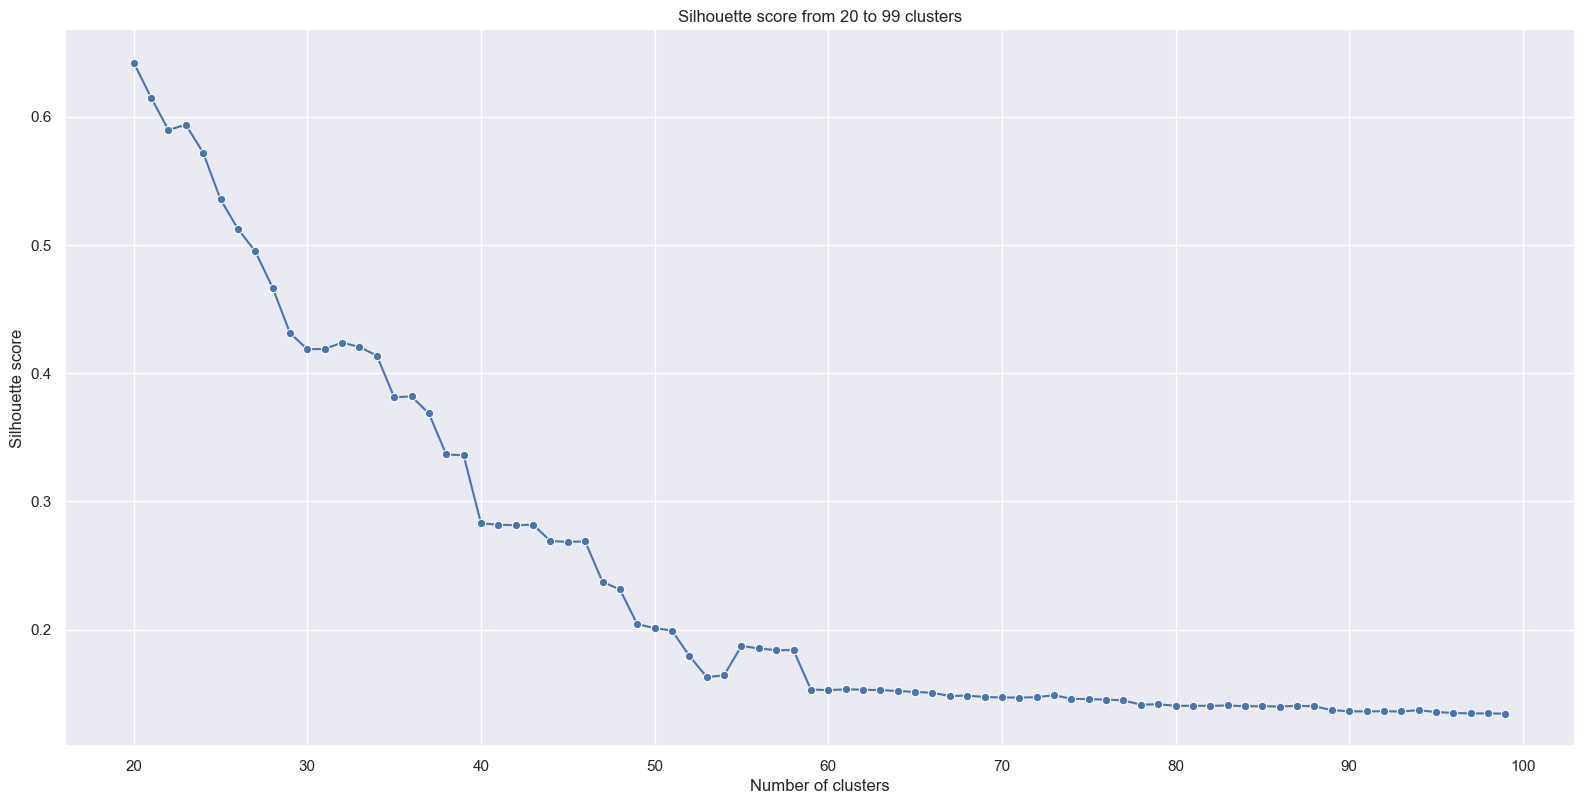

In [125]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);